# House Prices - Advanced Regression Techniques

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from IPython.display import display, HTML

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mutual_info_score, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## 0. Información de las columnas


**SalePrice**: El precio de venta de la propiedad en dólares. Esta es la variable objetivo que se intenta predecir.

### Características generales de la propiedad:

- **MSSubClass**: La clase de edificio
- **MSZoning**: La clasificación general de zonificación
- **LotFrontage**: Pies lineales de calle conectados a la propiedad
- **LotArea**: Tamaño del lote en pies cuadrados
- **Street**: Tipo de acceso a la calle
- **Alley**: Tipo de acceso al callejón
- **LotShape**: Forma general de la propiedad
- **LandContour**: Planicie de la propiedad
- **Utilities**: Tipo de servicios públicos disponibles
- **LotConfig**: Configuración del lote
- **LandSlope**: Pendiente de la propiedad
- **Neighborhood**: Ubicaciones físicas dentro de los límites de la ciudad de Ames
- **Condition1** y **Condition2**: Proximidad a la carretera principal o ferrocarril

### Tipo y estilo de vivienda:

- **BldgType**: Tipo de vivienda
- **HouseStyle**: Estilo de la vivienda
- **OverallQual**: Calidad general del material y acabado
- **OverallCond**: Calificación general de la condición
- **YearBuilt**: Fecha de construcción original
- **YearRemodAdd**: Fecha de remodelación

### Características exteriores:

- **RoofStyle**: Tipo de techo
- **RoofMatl**: Material del techo
- **Exterior1st** y **Exterior2nd**: Revestimiento exterior de la casa
- **MasVnrType**: Tipo de revestimiento de mampostería
- **MasVnrArea**: Área de revestimiento de mampostería en pies cuadrados
- **ExterQual**: Calidad del material exterior
- **ExterCond**: Condición actual del material en el exterior

### Características del sótano:

- **Foundation**: Tipo de cimientos
- **BsmtQual**: Altura del sótano
- **BsmtCond**: Condición general del sótano
- **BsmtExposure**: Paredes del sótano a nivel de jardín o con salida
- **BsmtFinType1** y **BsmtFinType2**: Calidad del área terminada del sótano
- **BsmtFinSF1** y **BsmtFinSF2**: Pies cuadrados terminados de tipo 1 y 2
- **BsmtUnfSF**: Pies cuadrados sin terminar del área del sótano
- **TotalBsmtSF**: Pies cuadrados totales del área del sótano

### Sistemas y comodidades:

- **Heating**: Tipo de calefacción
- **HeatingQC**: Calidad y condición de la calefacción
- **CentralAir**: Aire acondicionado central
- **Electrical**: Sistema eléctrico

### Áreas de vivienda:

- **1stFlrSF**: Pies cuadrados del primer piso
- **2ndFlrSF**: Pies cuadrados del segundo piso
- **LowQualFinSF**: Pies cuadrados terminados de baja calidad (todos los pisos)
- **GrLivArea**: Área habitable sobre el suelo en pies cuadrados

### Baños y habitaciones:

- **BsmtFullBath**: Baños completos en el sótano
- **BsmtHalfBath**: Medios baños en el sótano
- **FullBath**: Baños completos sobre el nivel del suelo
- **HalfBath**: Medios baños sobre el nivel del suelo
- **Bedroom**: Número de dormitorios sobre el nivel del sótano
- **Kitchen**: Número de cocinas
- **KitchenQual**: Calidad de la cocina
- **TotRmsAbvGrd**: Total de habitaciones sobre el nivel del suelo (no incluye baños)
- **Functional**: Calificación de funcionalidad del hogar

### Características adicionales:

- **Fireplaces**: Número de chimeneas
- **FireplaceQu**: Calidad de la chimenea
- **GarageType**: Ubicación del garaje
- **GarageYrBlt**: Año en que se construyó el garaje
- **GarageFinish**: Acabado interior del garaje
- **GarageCars**: Tamaño del garaje en capacidad de autos
- **GarageArea**: Tamaño del garaje en pies cuadrados
- **GarageQual**: Calidad del garaje
- **GarageCond**: Condición del garaje
- **PavedDrive**: Entrada de coches pavimentada
- **WoodDeckSF**: Área de terraza de madera en pies cuadrados
- **OpenPorchSF**: Área de porche abierto en pies cuadrados
- **EnclosedPorch**: Área de porche cerrado en pies cuadrados
- **3SsnPorch**: Área de porche de tres estaciones en pies cuadrados
- **ScreenPorch**: Área de porche con mosquitero en pies cuadrados
- **PoolArea**: Área de la piscina en pies cuadrados
- **PoolQC**: Calidad de la piscina
- **Fence**: Calidad de la cerca
- **MiscFeature**: Característica miscelánea no cubierta en otras categorías
- **MiscVal**: Valor en $ de la característica miscelánea

### Información de venta:

- **MoSold**: Mes de venta
- **YrSold**: Año de venta
- **SaleType**: Tipo de venta
- **SaleCondition**: Condición de la venta


In [146]:
variables_dict = {
    # Variable objetivo
    'SalePrice': 'Precio de venta de la propiedad en dólares',
    
    # Características generales de la propiedad
    'MSSubClass': 'Clase de edificio',
    'MSZoning': 'Clasificación general de zonificación',
    'LotFrontage': 'Pies lineales de calle conectados a la propiedad',
    'LotArea': 'Tamaño del lote en pies cuadrados',
    'Street': 'Tipo de acceso a la calle',
    'Alley': 'Tipo de acceso al callejón',
    'LotShape': 'Forma general de la propiedad',
    'LandContour': 'Planicie de la propiedad',
    'Utilities': 'Tipo de servicios públicos disponibles',
    'LotConfig': 'Configuración del lote',
    'LandSlope': 'Pendiente de la propiedad',
    'Neighborhood': 'Ubicaciones físicas dentro de los límites de la ciudad de Ames',
    'Condition1': 'Proximidad a la carretera principal o ferrocarril',
    'Condition2': 'Proximidad a la carretera principal o ferrocarril (si hay una segunda)',
    
    # Tipo y estilo de vivienda
    'BldgType': 'Tipo de vivienda',
    'HouseStyle': 'Estilo de la vivienda',
    'OverallQual': 'Calidad general del material y acabado',
    'OverallCond': 'Calificación general de la condición',
    'YearBuilt': 'Fecha de construcción original',
    'YearRemodAdd': 'Fecha de remodelación',
    
    # Características exteriores
    'RoofStyle': 'Tipo de techo',
    'RoofMatl': 'Material del techo',
    'Exterior1st': 'Revestimiento exterior de la casa',
    'Exterior2nd': 'Revestimiento exterior secundario de la casa',
    'MasVnrType': 'Tipo de revestimiento de mampostería',
    'MasVnrArea': 'Área de revestimiento de mampostería en pies cuadrados',
    'ExterQual': 'Calidad del material exterior',
    'ExterCond': 'Condición actual del material en el exterior',
    
    # Características del sótano
    'Foundation': 'Tipo de cimientos',
    'BsmtQual': 'Altura del sótano',
    'BsmtCond': 'Condición general del sótano',
    'BsmtExposure': 'Paredes del sótano a nivel de jardín o con salida',
    'BsmtFinType1': 'Calidad del área terminada del sótano',
    'BsmtFinType2': 'Calidad de la segunda área terminada del sótano (si existe)',
    'BsmtFinSF1': 'Pies cuadrados terminados de tipo 1',
    'BsmtFinSF2': 'Pies cuadrados terminados de tipo 2',
    'BsmtUnfSF': 'Pies cuadrados sin terminar del área del sótano',
    'TotalBsmtSF': 'Pies cuadrados totales del área del sótano',
    
    # Sistemas y comodidades
    'Heating': 'Tipo de calefacción',
    'HeatingQC': 'Calidad y condición de la calefacción',
    'CentralAir': 'Aire acondicionado central',
    'Electrical': 'Sistema eléctrico',
    
    # Áreas de vivienda
    '1stFlrSF': 'Pies cuadrados del primer piso',
    '2ndFlrSF': 'Pies cuadrados del segundo piso',
    'LowQualFinSF': 'Pies cuadrados terminados de baja calidad (todos los pisos)',
    'GrLivArea': 'Área habitable sobre el suelo en pies cuadrados',
    
    # Baños y habitaciones
    'BsmtFullBath': 'Baños completos en el sótano',
    'BsmtHalfBath': 'Medios baños en el sótano',
    'FullBath': 'Baños completos sobre el nivel del suelo',
    'HalfBath': 'Medios baños sobre el nivel del suelo',
    'Bedroom': 'Número de dormitorios sobre el nivel del sótano',
    'Kitchen': 'Número de cocinas',
    'KitchenQual': 'Calidad de la cocina',
    'TotRmsAbvGrd': 'Total de habitaciones sobre el nivel del suelo (no incluye baños)',
    'Functional': 'Calificación de funcionalidad del hogar',
    
    # Características adicionales
    'Fireplaces': 'Número de chimeneas',
    'FireplaceQu': 'Calidad de la chimenea',
    'GarageType': 'Ubicación del garaje',
    'GarageYrBlt': 'Año en que se construyó el garaje',
    'GarageFinish': 'Acabado interior del garaje',
    'GarageCars': 'Tamaño del garaje en capacidad de autos',
    'GarageArea': 'Tamaño del garaje en pies cuadrados',
    'GarageQual': 'Calidad del garaje',
    'GarageCond': 'Condición del garaje',
    'PavedDrive': 'Entrada de coches pavimentada',
    'WoodDeckSF': 'Área de terraza de madera en pies cuadrados',
    'OpenPorchSF': 'Área de porche abierto en pies cuadrados',
    'EnclosedPorch': 'Área de porche cerrado en pies cuadrados',
    '3SsnPorch': 'Área de porche de tres estaciones en pies cuadrados',
    'ScreenPorch': 'Área de porche con mosquitero en pies cuadrados',
    'PoolArea': 'Área de la piscina en pies cuadrados',
    'PoolQC': 'Calidad de la piscina',
    'Fence': 'Calidad de la cerca',
    'MiscFeature': 'Característica miscelánea no cubierta en otras categorías',
    'MiscVal': 'Valor en $ de la característica miscelánea',
    
    # Información de venta
    'MoSold': 'Mes de venta',
    'YrSold': 'Año de venta',
    'SaleType': 'Tipo de venta',
    'SaleCondition': 'Condición de la venta'
}

## 1. Método globales

In [148]:
from IPython.display import display, HTML

def scroll_box(contenido, altura_maxima=200):
    display(HTML(f"<div style='max-height: {altura_maxima}px; overflow-y: scroll;'>{contenido}</div>"))

## 2. Carga de datos

In [150]:
train = pd.read_csv("./info/train.csv")
test =  pd.read_csv("./info/test.csv")

In [151]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [152]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [153]:
print(f"Longitud de los datos de test: {len(test)} \nLongitud de los datos de entrenamiento: {len(train)} \nLongitud total de datos: {len(test)+len(train)}")

Longitud de los datos de test: 1459 
Longitud de los datos de entrenamiento: 1460 
Longitud total de datos: 2919


In [154]:
df = pd.concat([train, test], axis=0)
columnas = df.columns

In [155]:
columnas

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 3. Exploración inicial de los datos

### 3.1 Visión general del conjunto de datos

In [158]:
print(f"Hay {df.size} datos")

Hay 236439 datos


In [159]:
scroll_box(df.dtypes.to_frame().to_html() )

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [160]:
# Cantidad de columnas por cada tipo de dato
print("Cantidad de variables por tipo de dato:")
print(df.dtypes.value_counts())

Cantidad de variables por tipo de dato:
object     43
int64      26
float64    12
Name: count, dtype: int64


In [161]:
# Separar columnas por tipo de dato
numericas = df.select_dtypes(include=['int64', 'float64'])
categoricas = df.select_dtypes(include=['object'])

In [162]:
print("Cantidad de variables numéricas:", len(numericas))
print("Variables numéricas:", len(numericas), end="\n\n")
scroll_box(numericas.columns.to_list())

Cantidad de variables numéricas: 2919
Variables numéricas: 2919



In [163]:
print("Cantidad de variables categóricas:", len(categoricas))
print("Variables categóricas:", len(categoricas), end="\n\n")
scroll_box(categoricas.columns.to_list())

Cantidad de variables categóricas: 2919
Variables categóricas: 2919



In [164]:
# Resumen estadístico variables numéricas y categóricas
print("Resumen estadístico incluyendo variables categóricas:")
scroll_box(df.describe(include='all').T.to_html())


Resumen estadístico incluyendo variables categóricas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2919.0,NaN,NaN,NaN,1460.0,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,NaN,NaN,NaN,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
MSZoning,2915,5,RL,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,2433.0,NaN,NaN,NaN,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,NaN,NaN,NaN,10168.11408,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
Street,2919,2,Pave,2907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,198,2,Grvl,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,2919,4,Reg,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,2919,4,Lvl,2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2917,2,AllPub,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 Análisis de valores faltantes

In [166]:
# Número total de valores faltantes por columna
valores_faltantes = pd.DataFrame({
    'Valores Faltantes': df.isnull().sum(),
    'Total Filas': len(df),
    'Porcentaje': (df.isnull().sum() / len(df)) * 100,
    'Es Categórica': df.isnull().sum().index.isin(categoricas)
})
scroll_box(valores_faltantes.to_html())

,Valores Faltantes,Total Filas,Porcentaje,Es Categórica
Id,0,2919,0.000000,False
MSSubClass,0,2919,0.000000,False
MSZoning,4,2919,0.137033,True
LotFrontage,486,2919,16.649538,False
LotArea,0,2919,0.000000,False
Street,0,2919,0.000000,True
Alley,2721,2919,93.216855,True
LotShape,0,2919,0.000000,True
LandContour,0,2919,0.000000,True
Utilities,2,2919,0.068517,True


In [167]:
print(f"Total de valores faltantes en el dataset: {df.isnull().sum().sum()}")
print(f"Porcentaje total de valores faltantes: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Total de valores faltantes en el dataset: 17166
Porcentaje total de valores faltantes: 7.26%


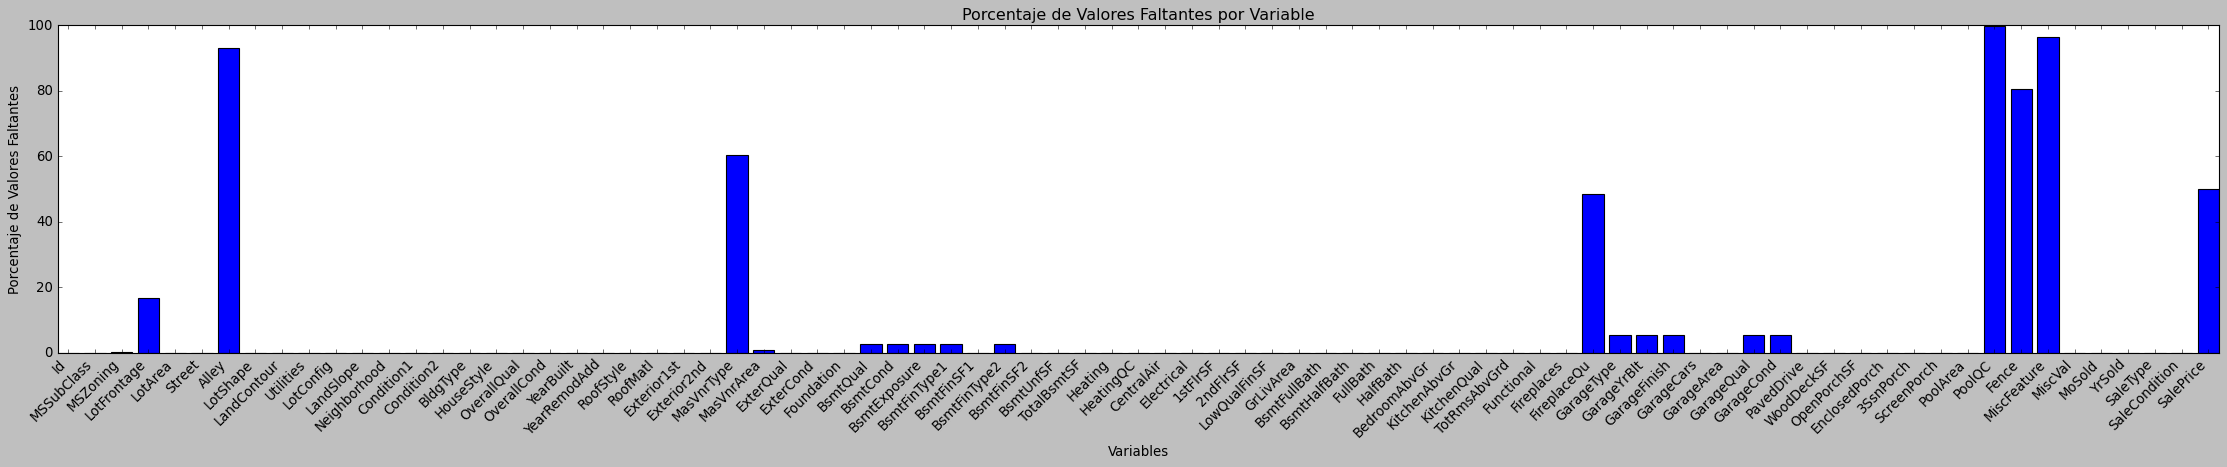

In [168]:
# Visualización de los valores faltantes por variable
plt.figure(figsize=(28, 6))
plt.bar(valores_faltantes.index, valores_faltantes['Porcentaje'])
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.tight_layout()
plt.show()

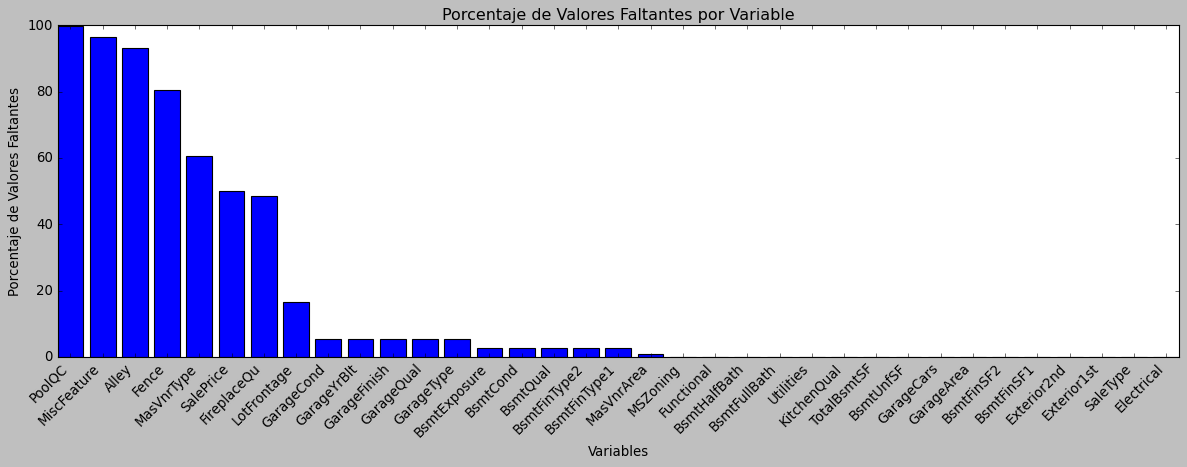

In [169]:
columnas_con_valores_faltantes = valores_faltantes[valores_faltantes['Valores Faltantes'] > 0].sort_values(
    'Porcentaje', ascending=False)

plt.figure(figsize=(15, 6))
# El error estaba aquí: debes usar columnas_con_valores_faltantes['Porcentaje'] en lugar de missing_values['Porcentaje']
plt.bar(columnas_con_valores_faltantes.index, columnas_con_valores_faltantes['Porcentaje'])
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.tight_layout()
plt.show()

In [170]:
# Separar variables por porcentaje de valores faltantes
print("Variables con más del 50% de valores faltantes:")
print(valores_faltantes[valores_faltantes['Porcentaje'] > 50].index.tolist())

print("\nVariables con 20-50% de valores faltantes:")
print(valores_faltantes[(valores_faltantes['Porcentaje'] > 20) & 
                    (valores_faltantes['Porcentaje'] <= 50)].index.tolist())

print("\nVariables con menos del 20% de valores faltantes:")
print(valores_faltantes[valores_faltantes['Porcentaje'] <= 20].index.tolist())

Variables con más del 50% de valores faltantes:
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

Variables con 20-50% de valores faltantes:
['FireplaceQu', 'SalePrice']

Variables con menos del 20% de valores faltantes:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'Ga

## 4. Análisis de la variable objetivo (SalePrice)

### 4.1 Graficamos la distribución SalePrice

C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


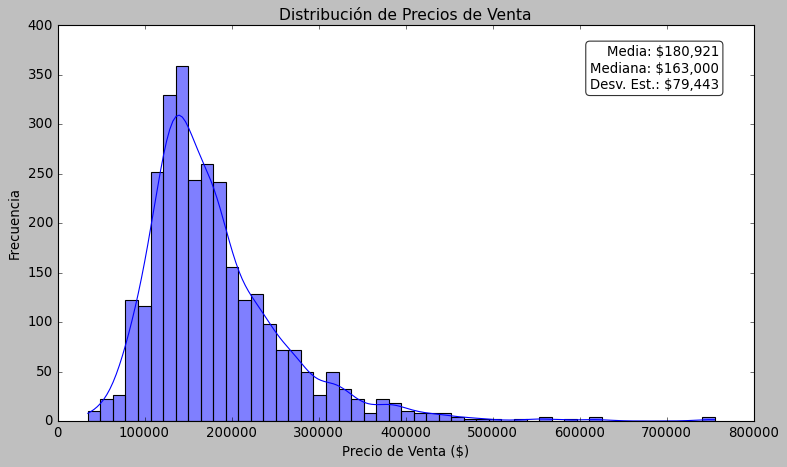


Asimetría: 1.88
Curtosis: 6.54


In [173]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

# Histograma con distribución normal superpuesta
sns.histplot(data=df, x='SalePrice', bins=50, kde=True)
plt.title('Distribución de Precios de Venta', fontsize=14)
plt.xlabel('Precio de Venta ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

stats = f'Media: ${df.SalePrice.mean():,.0f}\n'
stats += f'Mediana: ${df.SalePrice.median():,.0f}\n'
stats += f'Desv. Est.: ${df.SalePrice.std():,.0f}'

plt.text(0.95, 0.95, stats,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

print(f"\nAsimetría: {df.SalePrice.skew():.2f}")
print(f"Curtosis: {df.SalePrice.kurtosis():.2f}")

Observaciones:

- Una distribución **asimétrica positiva** o también llamada **sesgada a la derecha** (media > mediana) esto significa que la mayoría de las casas se concentran en los precios más bajos (entre 100,000 y 200,000)
- La curva de densidad (línea azul) nos indica que hay una alta concentración de ventas en ese rango de precios
- Algunos valores atípicos en los precios más altos. Podemos afirmar que no resulta común casas por encima de los 400,000$
- Una concentración de valores en los rangos de precios más bajos
- El pico más alto está alrededor de los 140,000-160,000 indicando que este es el rango de precio más común
- La frecuencia disminuye rápidamente después de los 300,000
- Hay muy pocas casas con precios superiores a 500,000


**Media**: $180,921 - este valor es mayor que la mediana debido a la asimetría

**Mediana**: $163,000 - el 50% de las casas están por debajo de este precio

**Desviación estándar**: $79,443 - indica qué tan dispersos o "esparcidos" están los datos con respecto a la media. Tiene un valor elevando ya que hay mucha variedad de precios distintos

Distribución de precios por segmento:

                         Cantidad  Porcentaje
Segmento_Precio                             
Bajo (<100k)                 114        3.91
Medio-Bajo (100k-200k)       911       31.21
Medio (200k-300k)            320       10.96
Medio-Alto (300k-400k)        87        2.98
Alto (>400k)                  28        0.96 



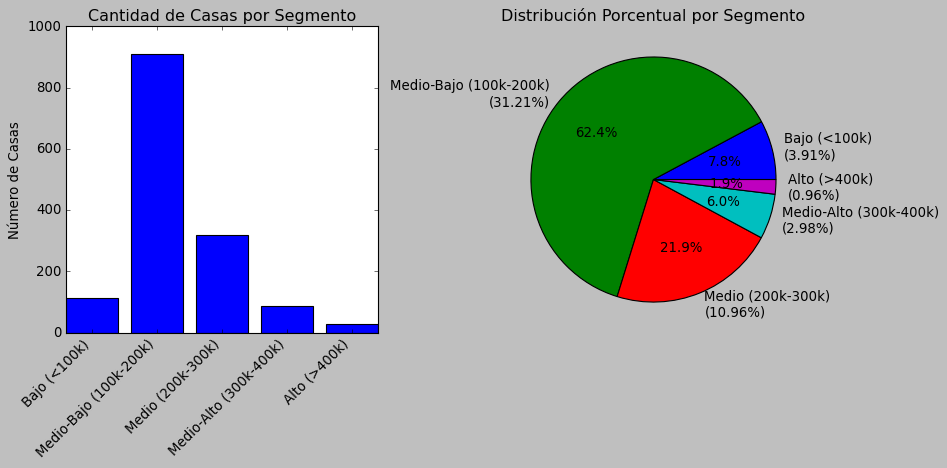

In [176]:
# Segmentación de precios por rangos
rangos = [0, 100000, 200000, 300000, 400000, float('inf')]
etiquetas = ['Bajo (<100k)', 'Medio-Bajo (100k-200k)', 'Medio (200k-300k)', 
             'Medio-Alto (300k-400k)', 'Alto (>400k)']

df['Segmento_Precio'] = pd.cut(df['SalePrice'], bins=rangos, labels=etiquetas, right=False)

segmentacion = df['Segmento_Precio'].value_counts().sort_index()
porcentajes = (segmentacion / len(df) * 100).round(2)

resultados = pd.DataFrame({
    'Cantidad': segmentacion,
    'Porcentaje': porcentajes
})

print("Distribución de precios por segmento:")
print(f"\n {resultados} \n")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(resultados.index, resultados['Cantidad'])
plt.title('Cantidad de Casas por Segmento')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Casas')

# Gráfico de pastel
plt.subplot(1, 2, 2)
plt.pie(resultados['Porcentaje'], labels=[f'{idx}\n({val}%)' 
        for idx, val in zip(resultados.index, resultados['Porcentaje'])],
        autopct='%1.1f%%')
plt.title('Distribución Porcentual por Segmento')

plt.tight_layout()
plt.show()

In [177]:
df = df.drop(columns=['Segmento_Precio'])

### 4.2 Identificación de valores atípicos en SalePrice

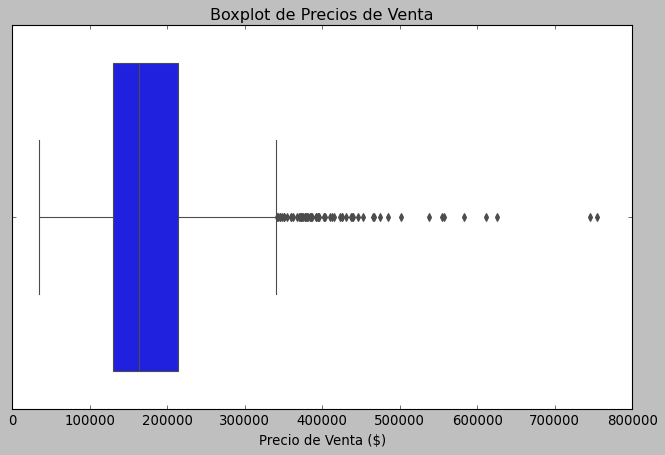

In [179]:
# Bloxplot de los valores atípicos para SalesPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot de Precios de Venta')
plt.xlabel('Precio de Venta ($)')
plt.show()

In [180]:
#  Cálculo de valores atípicos usando el método IQR
Q1 = df.SalePrice.quantile(0.25)
Mediana = df.SalePrice.quantile(0.5)
Q3 = df.SalePrice.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df[(df['SalePrice'] < limite_inferior) | (df['SalePrice'] > limite_superior)]

print("\nEstadísticas de valores atípicos:")
print(f"Primer cuartil (Q1): ${Q1:,.2f}")
print(f"Línea central (Mediana): ${Mediana:,.2f}")
print(f"Tercer cuartil (Q3): ${Q3:,.2f}")
print("-------")
print(f"Bigote del límite inferior: ${limite_inferior:,.2f}")
print(f"Bigote del límite superior: ${limite_superior:,.2f}")
print("-------")
print(f"Número de valores atípicos: {len(valores_atipicos)}")
print(f"Porcentaje de valores atípicos: {(len(valores_atipicos)/len(df))*100:.2f}%")


Estadísticas de valores atípicos:
Primer cuartil (Q1): $129,975.00
Línea central (Mediana): $163,000.00
Tercer cuartil (Q3): $214,000.00
-------
Bigote del límite inferior: $3,937.50
Bigote del límite superior: $340,037.50
-------
Número de valores atípicos: 61
Porcentaje de valores atípicos: 2.09%


- La mayoría de las casas se venden entre 129,975 y 214,000

- Los valores atípicos probablemente representan: Casas de lujo

In [182]:
# Mostrar los valores atípicos más extremos
print("Los 10 precios más altos:")
scroll_box(df.nlargest(10, 'SalePrice')[['SalePrice']].to_html(), 100)

print("Los 10 precios más bajos:")
scroll_box(df.nsmallest(10, 'SalePrice')[['SalePrice']].to_html(),100)

Los 10 precios más altos:


,SalePrice
691,755000.0
1182,745000.0
1169,625000.0
898,611657.0
803,582933.0
1046,556581.0
440,555000.0
769,538000.0
178,501837.0
798,485000.0


Los 10 precios más bajos:


,SalePrice
495,34900.0
916,35311.0
968,37900.0
533,39300.0
30,40000.0
710,52000.0
1337,52500.0
705,55000.0
1325,55000.0
812,55993.0


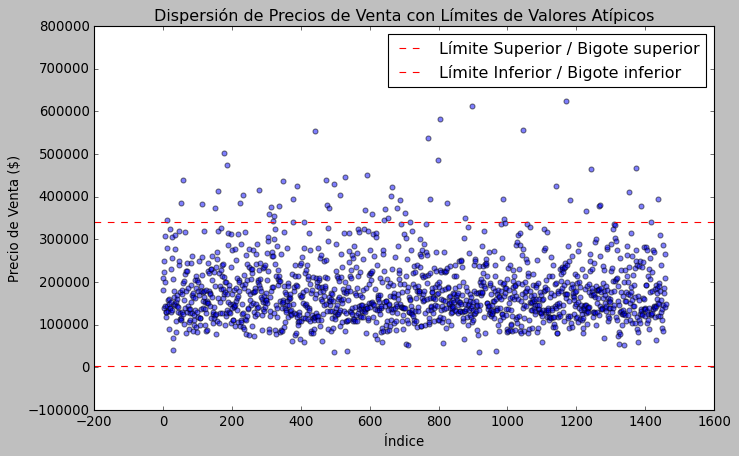

In [183]:
# Gráfico de dispersión con límites
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['SalePrice'])), df['SalePrice'], alpha=0.5)
plt.axhline(y=limite_superior, color='r', linestyle='--', label='Límite Superior / Bigote superior')
plt.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite Inferior / Bigote inferior')
plt.title('Dispersión de Precios de Venta con Límites de Valores Atípicos')
plt.ylabel('Precio de Venta ($)')
plt.xlabel('Índice')
plt.legend()
plt.show()

**Distribución general:**

- La mayoría de los precios se concentran entre 100,000 dólares y 200,000 dólares
- Hay una banda clara de precios "normales" que forma el grueso de los datos
- Los datos muestran una dispersión bastante consistente a lo largo de todo el índice
  
**Valores atípicos:**

- El límite superior (línea roja punteada) está aproximadamente en 340,000 dólares
- El límite inferior (línea roja punteada) está cerca de 0 dólares
- Hay varios valores atípicos por encima del límite superior
- El valor más extremo está cerca de 750,000 dólares
- No hay prácticamente valores atípicos por debajo del límite inferior

### 4.3 Valorar si es necesario aplicar una transformación

In [186]:
print(f"Diferencia Q3-Mediana: ${Q3-Mediana:,.2f}")
print(f"Diferencia Mediana-Q1: ${Mediana-Q1:,.2f}")

Diferencia Q3-Mediana: $51,000.00
Diferencia Mediana-Q1: $33,025.00


La diferencia entre Q3-Mediana (51,000) es mayor que la diferencia entre Mediana-Q1 (33,025) entonces indica una asimetría positiva. Además lo hemos graficado anteriormente.

La asimetría de los datos puede afectar a nuestra precisión de los análisis, una buena forma de corregir esta asímetria sería aplicando una **Transformación**, o aplicando otros métodos como **Winsorización** (reemplazar valores extremos por menos extremos), **Extracción atípica** (Eliminar valores atípicos puede ayudar a corregir la asimetría en la distribución, Sin embargo, es importante tener cuidado al eliminar los valores atípicos, ya que puede conducir a la  pérdida de información,Sin embargo, es importante tener cuidado al eliminar los valores atípicos, ya que puede conducir a la pérdida de información) o **Binning** (método para agrupar datos en contenedores o categorías)

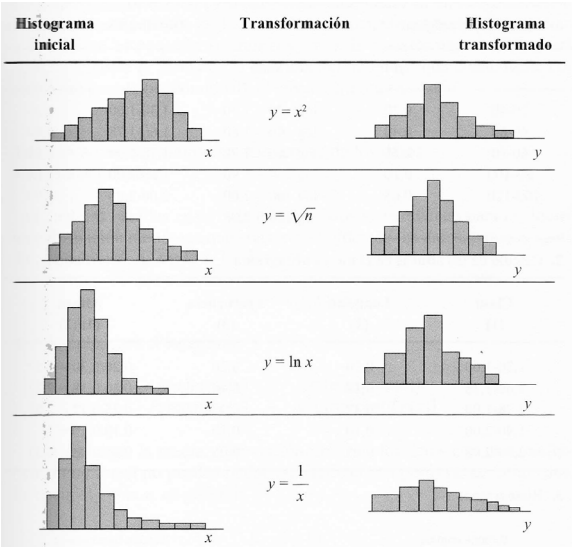

C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34665\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


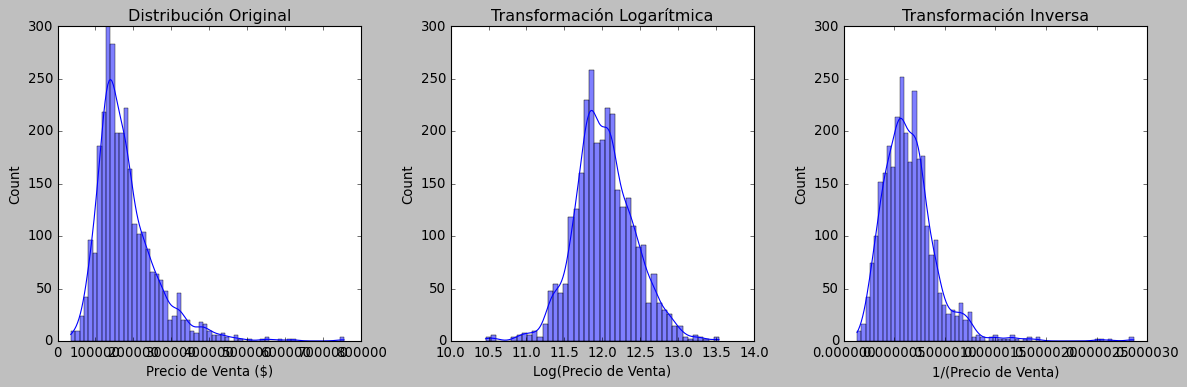

In [189]:
# Crear una figura con tres subplots
plt.figure(figsize=(15, 5))

# Distribución original
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Distribución Original')
plt.xlabel('Precio de Venta ($)')

# Transformación logarítmica
plt.subplot(1, 3, 2)
sns.histplot(data=df, x=np.log(df['SalePrice']), kde=True)
plt.title('Transformación Logarítmica')
plt.xlabel('Log(Precio de Venta)')

# Transformación inversa (1/x)
plt.subplot(1, 3, 3)
sns.histplot(data=df, x=1/df['SalePrice'], kde=True)
plt.title('Transformación Inversa')
plt.xlabel('1/(Precio de Venta)')

plt.tight_layout()
plt.show()

In [190]:
# Mostrar estadísticas de asimetría y curtosis para cada transformación
print("\nEstadísticas de asimetría y curtosis:")
print("\nOriginal:")
print(f"Asimetría: {df['SalePrice'].skew():.3f}")
print(f"Curtosis: {df['SalePrice'].kurtosis():.3f}")

print("\nLogarítmica:")
print(f"Asimetría: {np.log(df['SalePrice']).skew():.3f}")
print(f"Curtosis: {np.log(df['SalePrice']).kurtosis():.3f}")

print("\nTransformación Inversa:")
print(f"Asimetría: {np.sqrt(df['SalePrice']).skew():.3f}")
print(f"Curtosis: {np.sqrt(df['SalePrice']).kurtosis():.3f}")


Estadísticas de asimetría y curtosis:

Original:
Asimetría: 1.883
Curtosis: 6.536

Logarítmica:
Asimetría: 0.121
Curtosis: 0.810

Transformación Inversa:
Asimetría: 0.943
Curtosis: 1.958


Teniendo en cuenta estos valores de referencia:

**Curtosis**

value < 3 -> Platicúrtica

value == 3 -> Normal

value > 3 -> Leptocúrtica

**Asímetria**

[0, 0.5] -> Baja

[0.5,1] -> Moderada

[1,2] -> Alta

[,>2] -> Extrema

Por esto la transformación logarítmica es la mejor:

- Reduce la asimetría de ALTA (1.883) a BAJA (0.121)
- Mejora la curtosis de ALTA (6.536) a ACEPTABLE (0.810)

## 5. Análisis de características individuales

### 5.1 Variables numéricas

In [195]:
df = df.reset_index(drop=True)

numericas = df.select_dtypes(include=['int64', 'float64']).columns
numericas = numericas.drop(['Id']) if 'Id' in numericas else numericas

In [196]:
# Estadísticas de variables numéricas:
def analizar_variables_numericas(df, numericas):
    stats_dict = {
        'asimetria': df[numericas].skew(),
        'curtosis': df[numericas].kurtosis(),
        'nulos': df[numericas].isnull().sum(),
        'nulos_pct': (df[numericas].isnull().sum() / len(df) * 100).round(2)
    }
    return pd.DataFrame(stats_dict)
    
stats = analizar_variables_numericas(df, numericas)
scroll_box(stats.to_html())

,asimetria,curtosis,nulos,nulos_pct
MSSubClass,1.376165,1.457827,0,0.00
LotFrontage,1.503278,11.295921,486,16.65
LotArea,12.829025,264.952310,0,0.00
OverallQual,0.197212,0.067219,0,0.00
OverallCond,0.570605,1.479447,0,0.00
YearBuilt,-0.600114,-0.511317,0,0.00
YearRemodAdd,-0.451252,-1.346431,0,0.00
MasVnrArea,2.602589,9.254343,23,0.79
BsmtFinSF1,1.425722,6.904832,1,0.03
BsmtFinSF2,4.147456,18.836540,1,0.03


#### Análisis de Correlaciones con el Precio de Venta

En este análisis, estudiamos cómo las diferentes variables numéricas se relacionan con el precio de venta de las casas. Para ello, utilizamos el coeficiente de correlación, que nos indica la fuerza y dirección de la relación entre variables.

**Correlación**

- La correlación es un valor entre -1 y 1 que indica:
  * **1**: Correlación positiva perfecta (cuando una variable sube, la otra sube proporcionalmente)
  * **0**: No hay correlación (no hay relación lineal entre las variables)
  * **-1**: Correlación negativa perfecta (cuando una variable sube, la otra baja proporcionalmente)

**Interpretación de los Valores**

| Valor de Correlación | Interpretación |
|---------------------|----------------|
| 0.7 a 1.0 | Correlación fuerte positiva |
| 0.3 a 0.7 | Correlación moderada positiva |
| -0.3 a 0.3 | Correlación débil o nula |
| -0.7 a -0.3 | Correlación moderada negativa |
| -1.0 a -0.7 | Correlación fuerte negativa |

In [198]:
def analizar_correlaciones(df, numericas):
    correlaciones = df[numericas].corr()['SalePrice']
    return pd.DataFrame(correlaciones.sort_values(ascending=False))
    
correlaciones = analizar_correlaciones(df, numericas)

In [199]:
print("Variables más correlacionadas con SalePrice (correlación > 0.5):")
variables_numericas_significativas = correlaciones[abs(correlaciones['SalePrice']) > 0.5]
variables_numericas_significativas = variables_numericas_significativas.drop('SalePrice', errors='ignore')

scroll_box(variables_numericas_significativas.to_html())

Variables más correlacionadas con SalePrice (correlación > 0.5):


,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


**Correlaciones Muy Fuertes (> 0.7):**

- OverallQual (0.79): Calidad general de la casa -> Indica que la calidad es el factor más importante en el precio
- GrLivArea (0.71): Área habitable sobre el suelo -> El tamaño habitable impacta fuertemente en el precio

**Correlaciones Fuertes (0.6 - 0.7):**

- GarageCars (0.64): Capacidad del garaje -> ...
- GarageArea (0.62): Área del garaje
- TotalBsmtSF (0.61): Área total del sótano
- 1stFlrSF (0.61): Área del primer piso

**Correlaciones Moderadas (0.5 - 0.6)**

- FullBath (0.56): Baños completos
- TotRmsAbvGrd (0.53): Total de habitaciones sobre el suelo
- YearBuilt (0.52): Año de construcción
- YearRemodAdd (0.51): Año de remodelación

**Conclusiones**

La calidad de la casa y el tamaño es lo que más impacta en el precio, seguido de la cantidad de plazs de garaje y el tamaño de este y lo mismo para el sótano y el tamaño del primer piso. Después sería relevante los baños completos, el total de habitaciones, el año en el que está contruida y el año de remodelación ya que las casas nuevas o reformadas tienden a valer más

In [201]:
# Cálculo de la asímetria
asimetria = df[numericas].skew()
variables_asimetricas = asimetria[abs(asimetria) > 1].sort_values(ascending=False)

tabla_asimetria = pd.DataFrame({
    'Variable': variables_asimetricas.index,
    'Descripción': [variables_dict.get(var, 'Descripción no disponible') for var in variables_asimetricas.index],
    'Asimetría': variables_asimetricas.values
})

tabla_asimetria['Asimetría'] = tabla_asimetria['Asimetría'].round(3)

print("Variables con alta asimetría (asimetría > 1):\n")
scroll_box(tabla_asimetria.to_html())


Variables con alta asimetría (asimetría > 1):



,Variable,Descripción,Asimetría
0,MiscVal,Valor en $ de la característica miscelánea,21.958
1,PoolArea,Área de la piscina en pies cuadrados,16.907
2,LotArea,Tamaño del lote en pies cuadrados,12.829
3,LowQualFinSF,Pies cuadrados terminados de baja calidad (todos los pisos),12.095
4,3SsnPorch,Área de porche de tres estaciones en pies cuadrados,11.382
5,KitchenAbvGr,Descripción no disponible,4.304
6,BsmtFinSF2,Pies cuadrados terminados de tipo 2,4.147
7,EnclosedPorch,Área de porche cerrado en pies cuadrados,4.006
8,ScreenPorch,Área de porche con mosquitero en pies cuadrados,3.949
9,BsmtHalfBath,Medios baños en el sótano,3.932


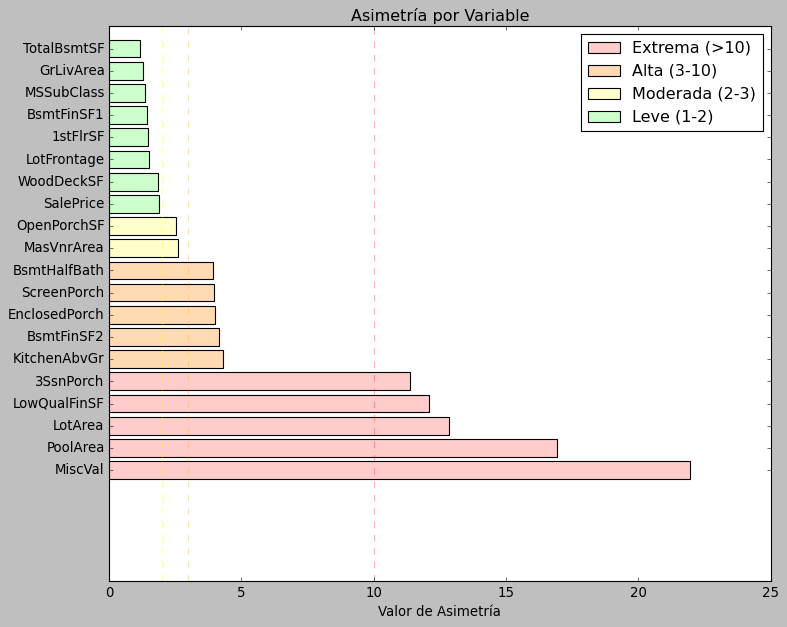

In [202]:
def plot_asimetria_variables(variables_asimetricas):
    plt.figure(figsize=(10, 8))
    
    colors = ['#ffcccc' if v > 10 else '#ffdab3' if v > 3 
              else '#ffffcc' if v > 2 else '#ccffcc' 
              for v in variables_asimetricas.values]
    
    y_pos = np.arange(len(variables_asimetricas))
    plt.barh(y_pos, variables_asimetricas.values, color=colors)
    
    plt.yticks(y_pos, variables_asimetricas.index)
    plt.xlabel('Valor de Asimetría')
    plt.title('Asimetría por Variable')
    
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#ffcccc', label='Extrema (>10)'),
        Patch(facecolor='#ffdab3', label='Alta (3-10)'),
        Patch(facecolor='#ffffcc', label='Moderada (2-3)'),
        Patch(facecolor='#ccffcc', label='Leve (1-2)')
    ]
    
    plt.axvline(x=10, color='red', linestyle='--', alpha=0.3)
    plt.axvline(x=3, color='orange', linestyle='--', alpha=0.3)
    plt.axvline(x=2, color='yellow', linestyle='--', alpha=0.3)
    
    plt.legend(handles=legend_elements, loc='best')
    
    plt.tight_layout()
    plt.show()

plot_asimetria_variables(variables_asimetricas)

**Conclusiones**

Sería interesante transformar aquellas variables con una simetría extrema, alta y moderada

### 5.2 Variables categóricas

In [205]:
categoricas = df.select_dtypes(include=['object'])

In [206]:
def explorar_categoricas(df):
    categoricas = df.select_dtypes(include=['object']).columns
    
    resumen = pd.DataFrame({
        'Descripcion': [variables_dict.get(col, 'No disponible') for col in categoricas],
        'N_Categorias': [df[col].nunique() for col in categoricas],
        'N_Valores_Faltantes': df[categoricas].isnull().sum(),
    })
    
    resumen = resumen.sort_values('N_Categorias', ascending=False)
    
    return resumen
    
scroll_box(explorar_categoricas(df).to_html())

,Descripcion,N_Categorias,N_Valores_Faltantes
Neighborhood,Ubicaciones físicas dentro de los límites de la ciudad de Ames,25,0
Exterior2nd,Revestimiento exterior secundario de la casa,16,1
Exterior1st,Revestimiento exterior de la casa,15,1
SaleType,Tipo de venta,9,1
Condition1,Proximidad a la carretera principal o ferrocarril,9,0
Condition2,Proximidad a la carretera principal o ferrocarril (si hay una segunda),8,0
HouseStyle,Estilo de la vivienda,8,0
RoofMatl,Material del techo,8,0
Functional,Calificación de funcionalidad del hogar,7,2
BsmtFinType2,Calidad de la segunda área terminada del sótano (si existe),6,80


In [207]:
# Distribución de cada variable categórica
def distribucion_categorica(df, variable):
    freq_abs = df[variable].value_counts()
    freq_rel = df[variable].value_counts(normalize=True)
    
    distribucion = pd.DataFrame({
        'Frecuencia': freq_abs,
        'Porcentaje': freq_rel * 100,
        'Porcentaje_Acumulado': freq_rel.cumsum() * 100
    })
    
    plt.figure(figsize=(12, 5))
    plt.bar(distribucion.index, distribucion['Frecuencia'])
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    return distribucion

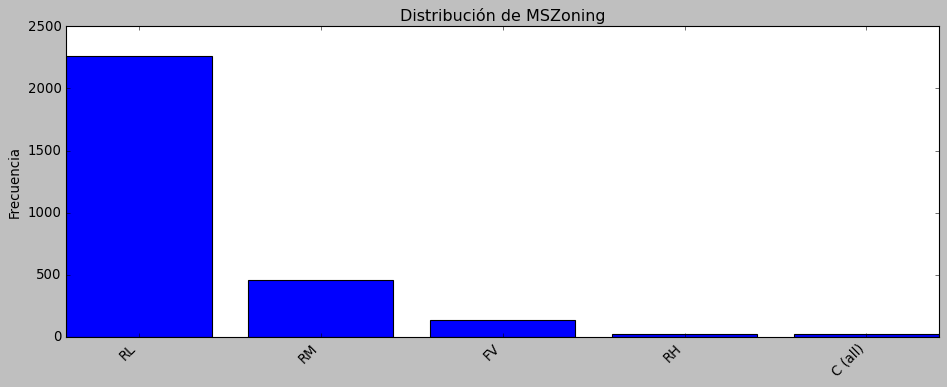

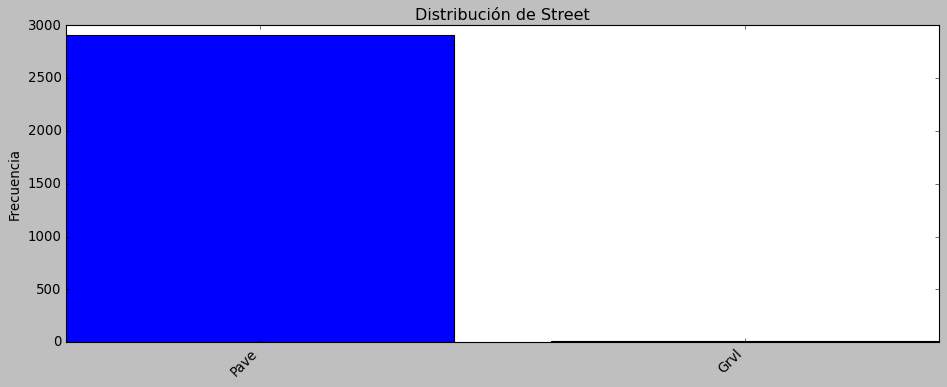

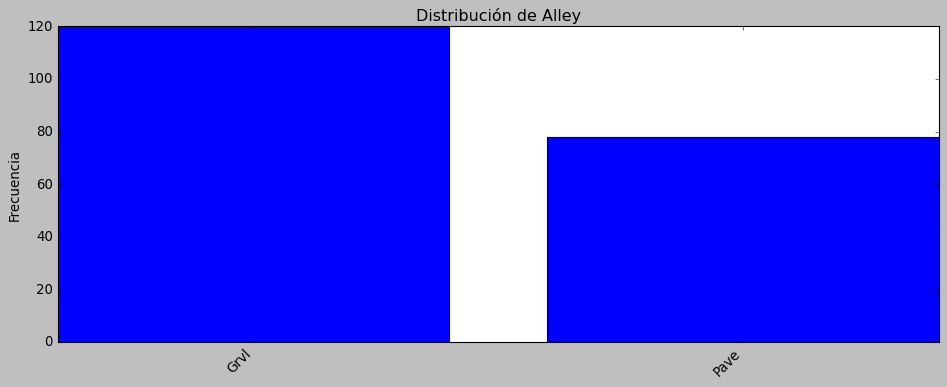

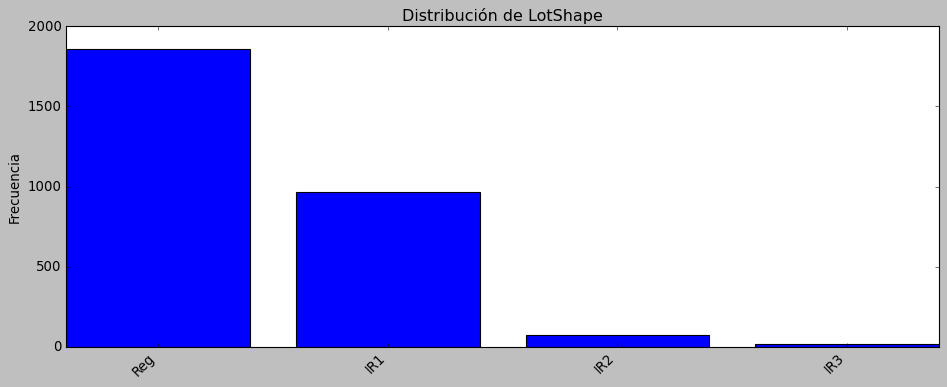

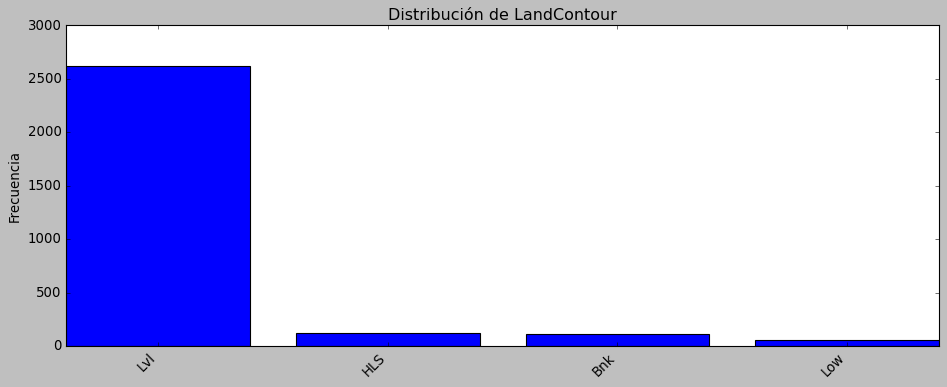

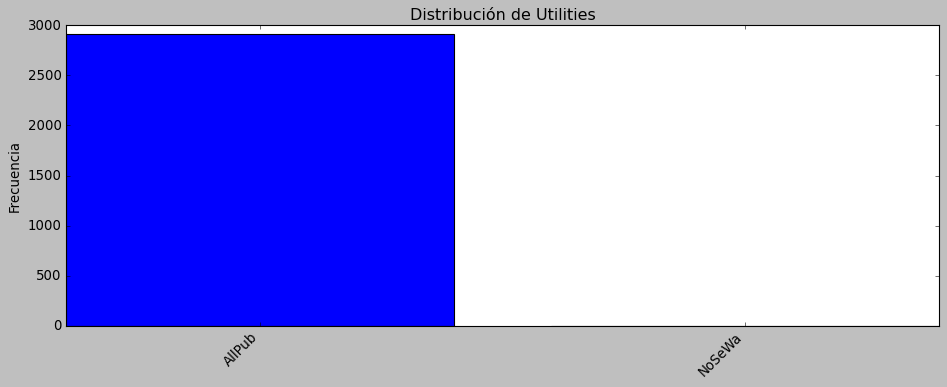

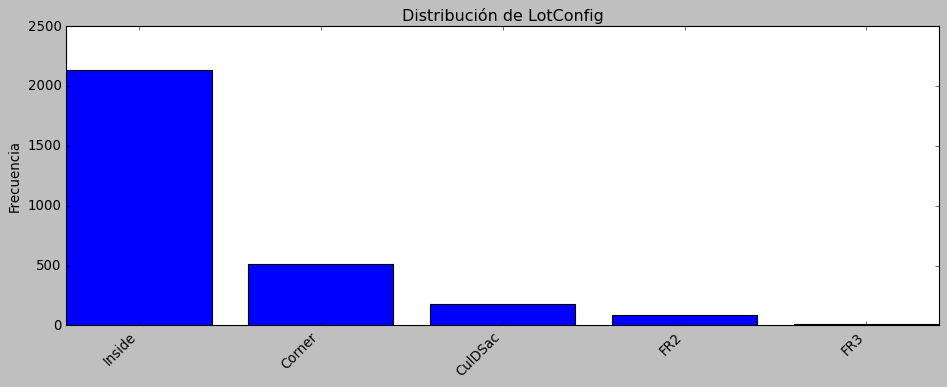

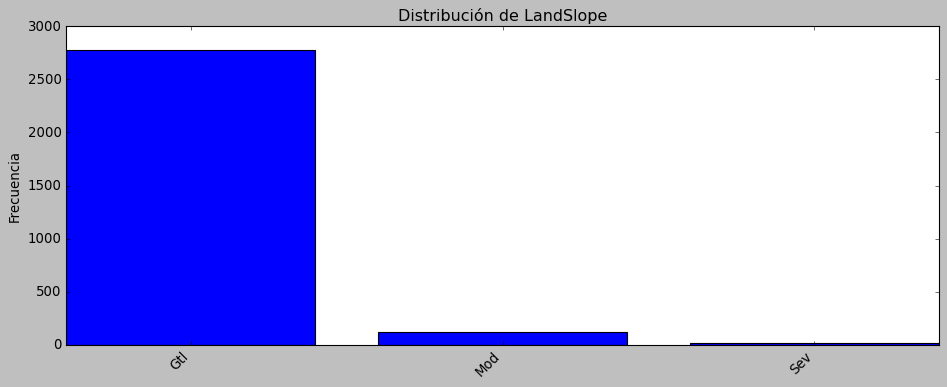

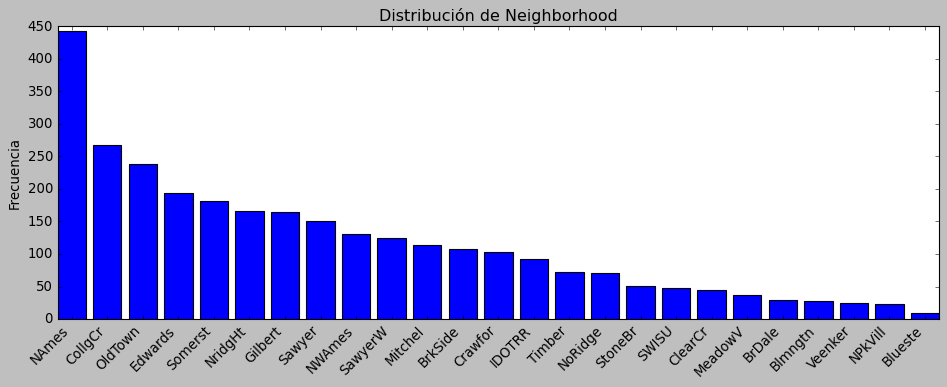

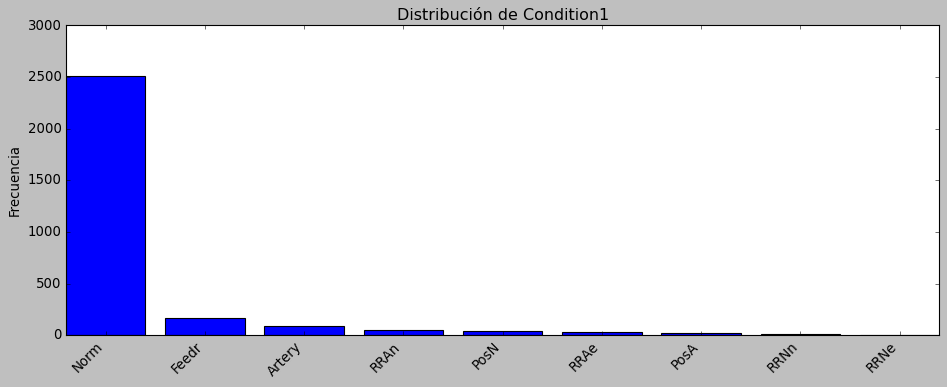

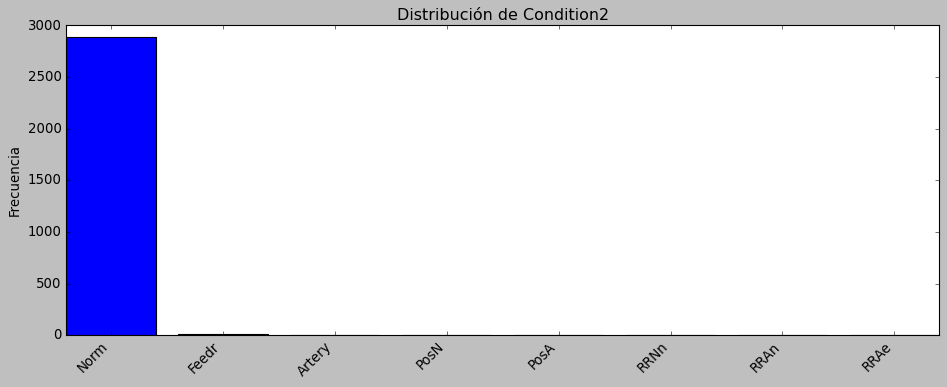

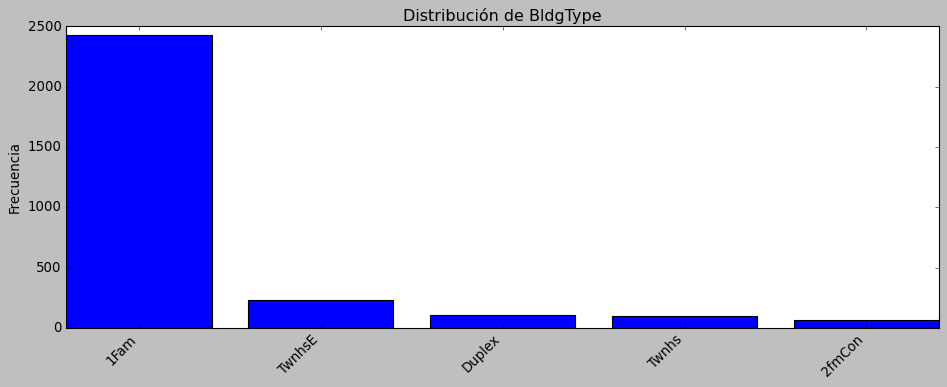

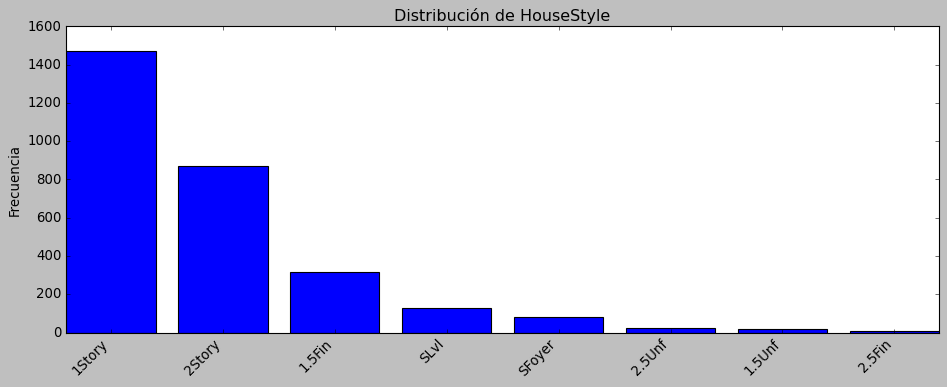

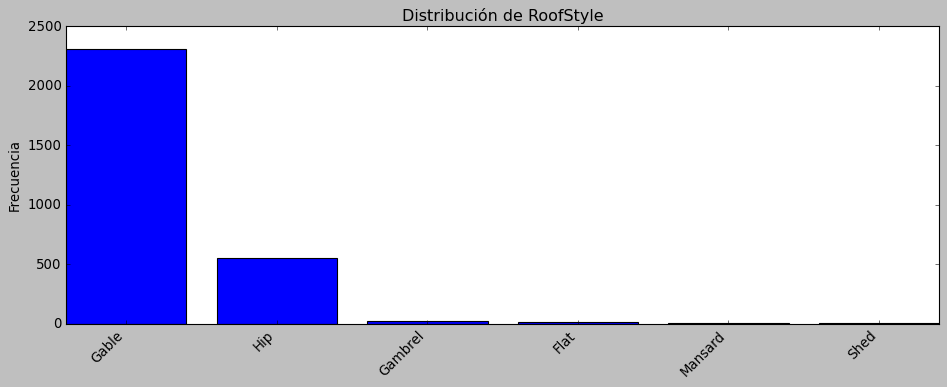

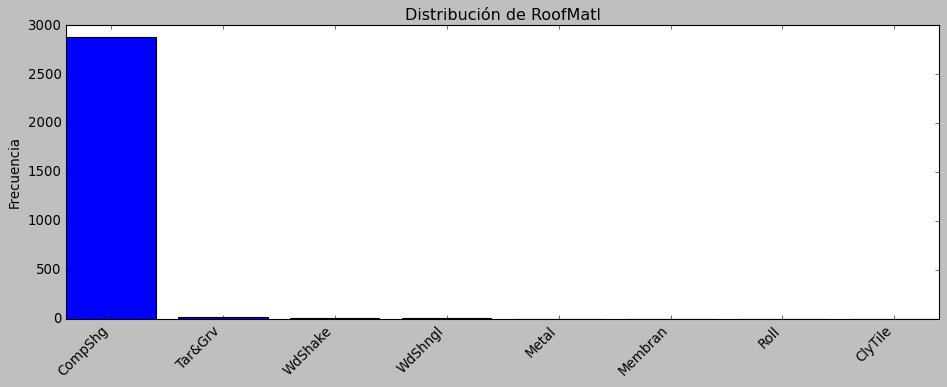

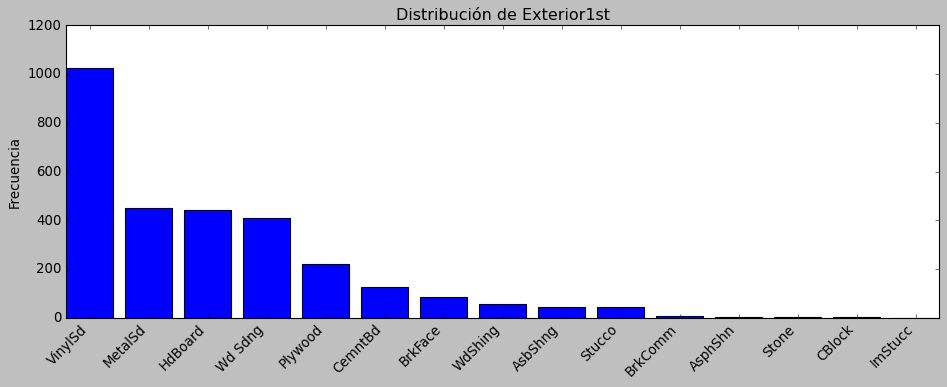

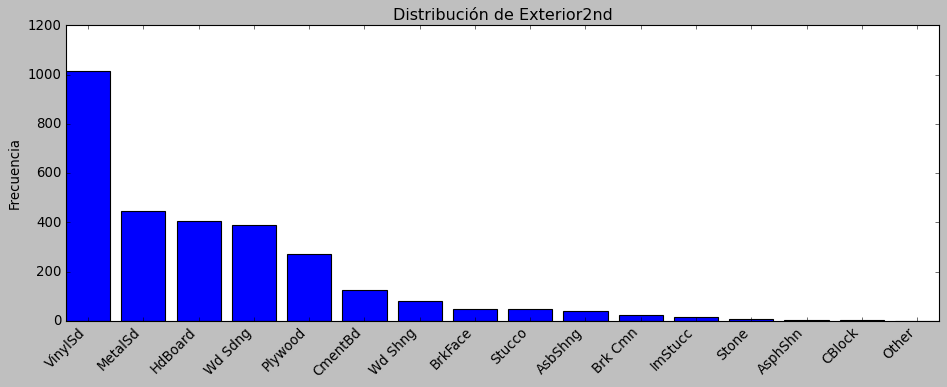

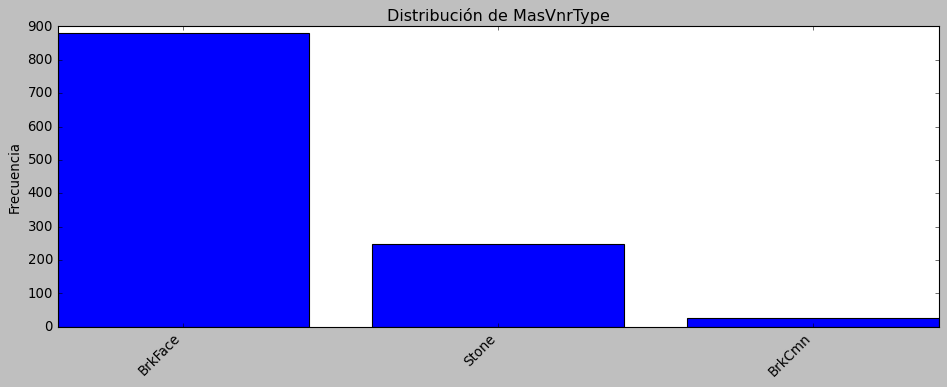

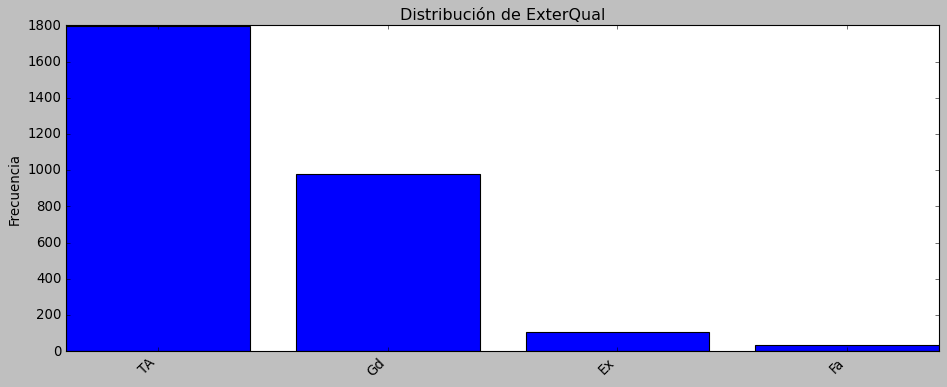

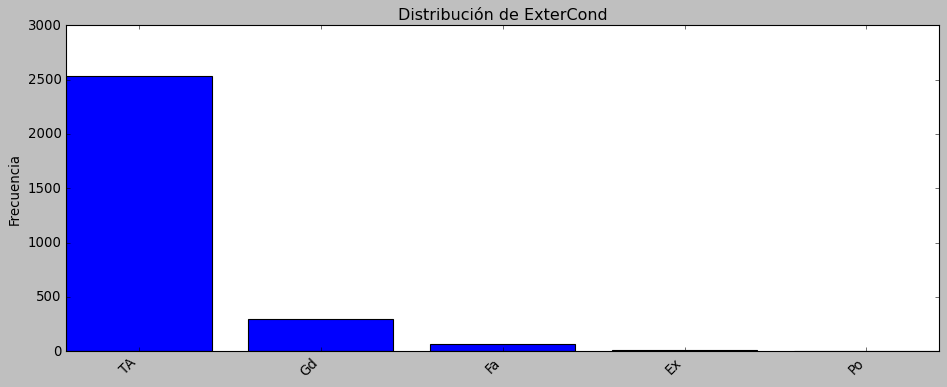

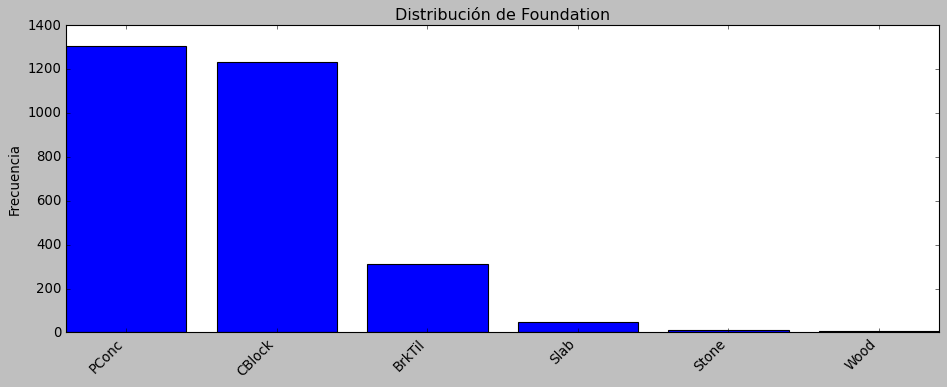

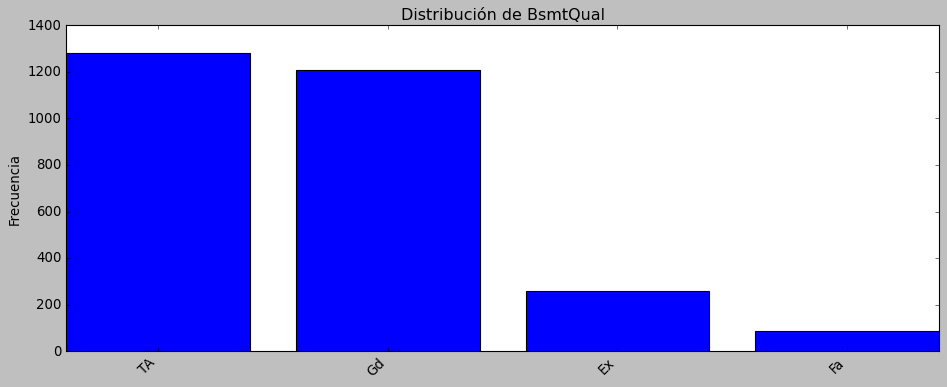

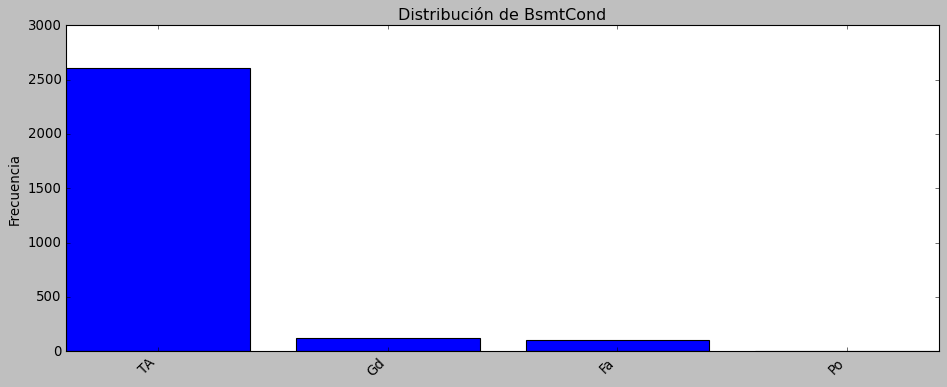

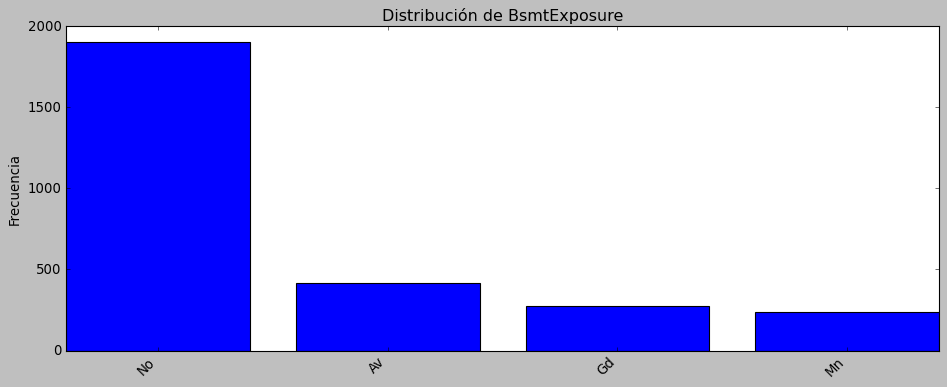

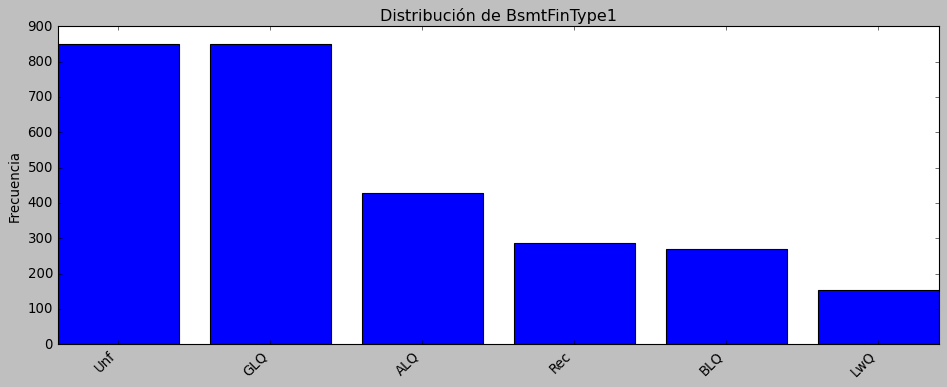

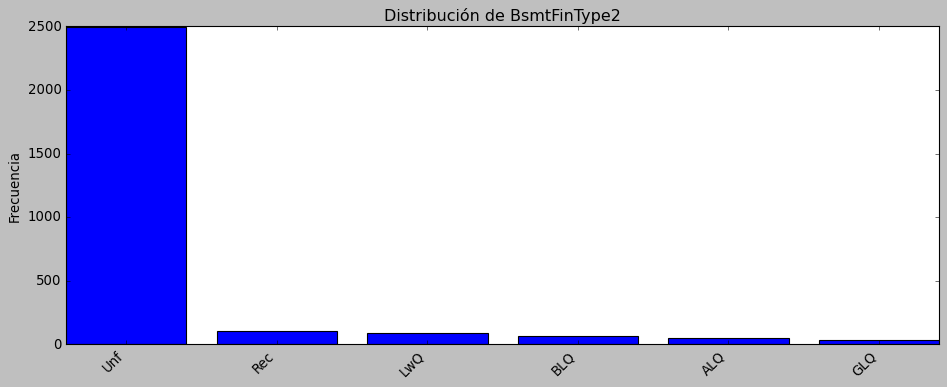

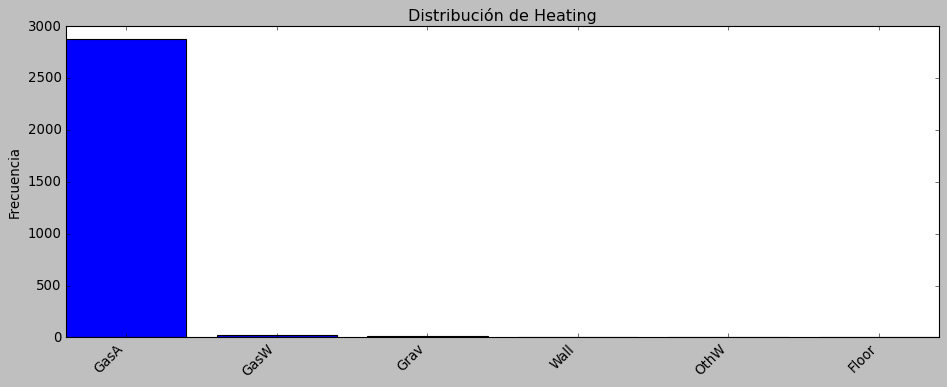

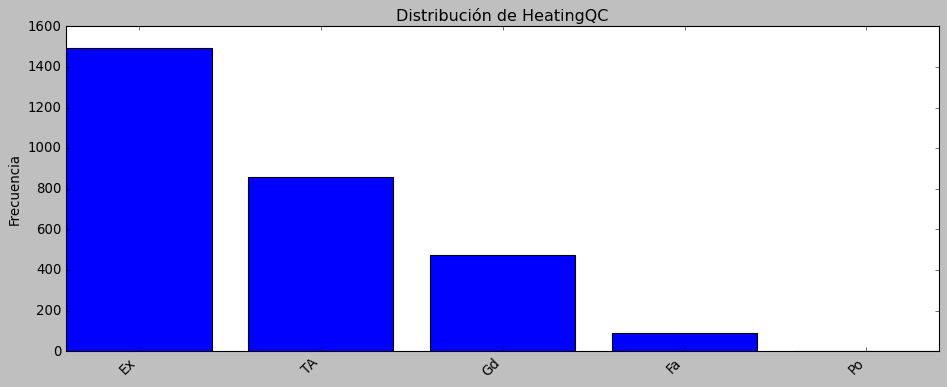

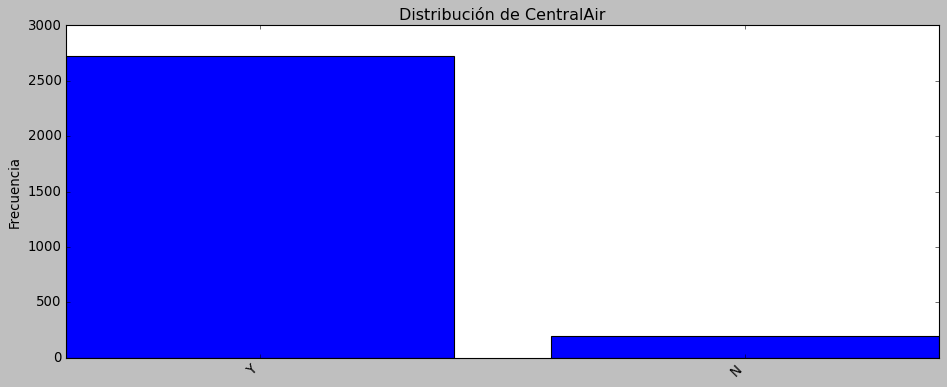

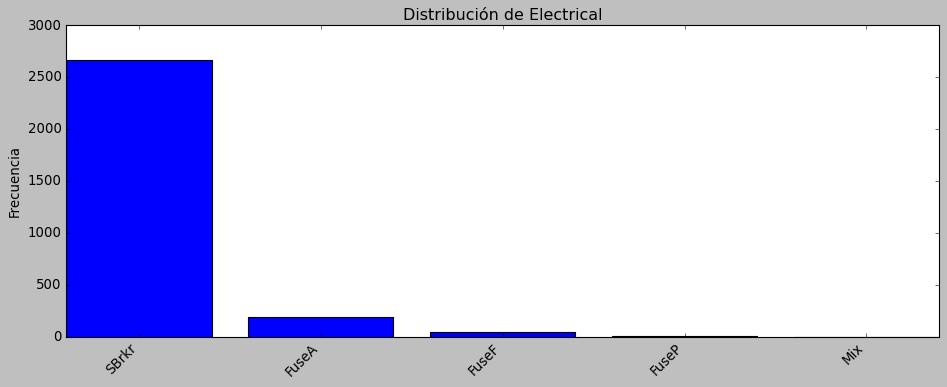

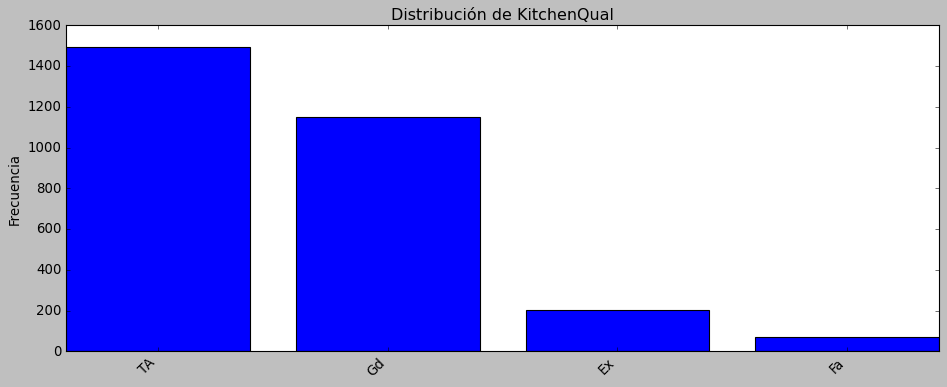

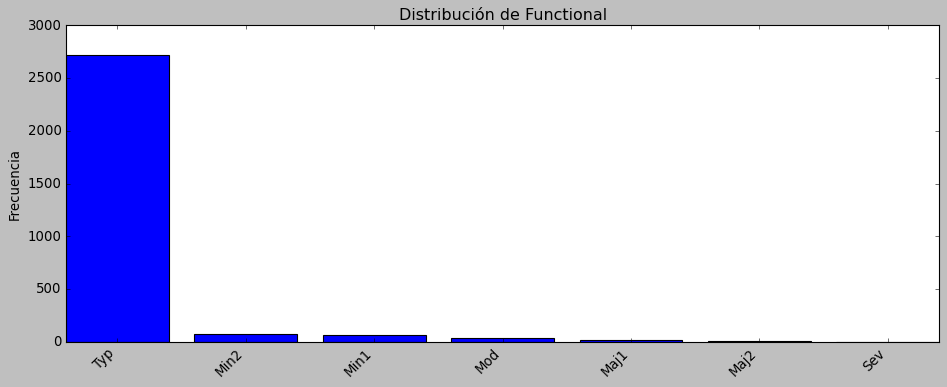

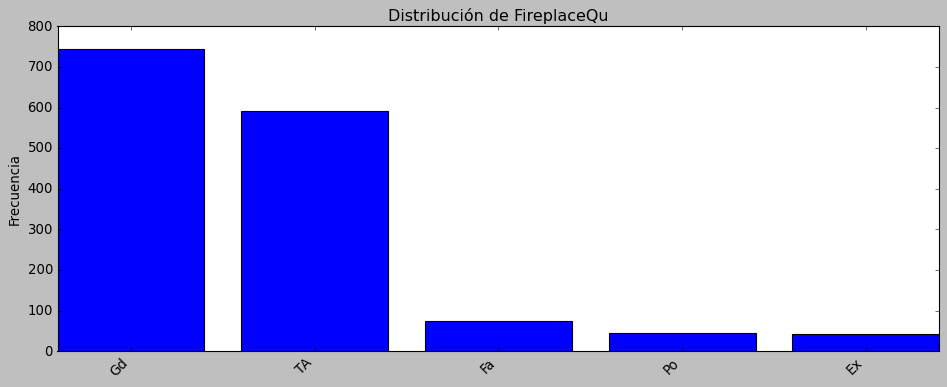

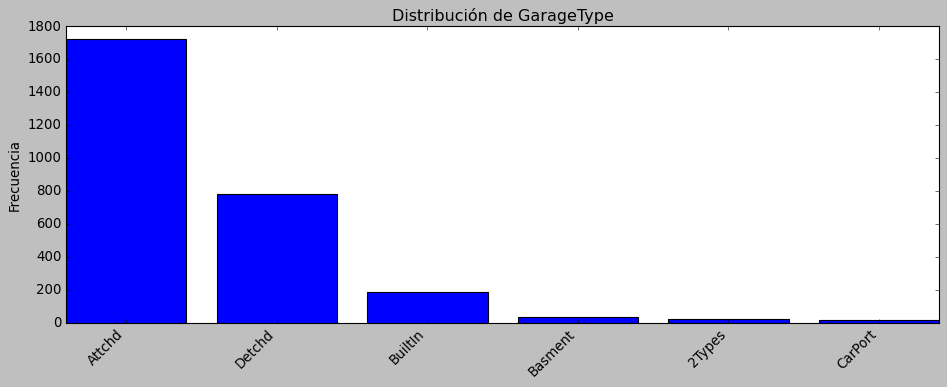

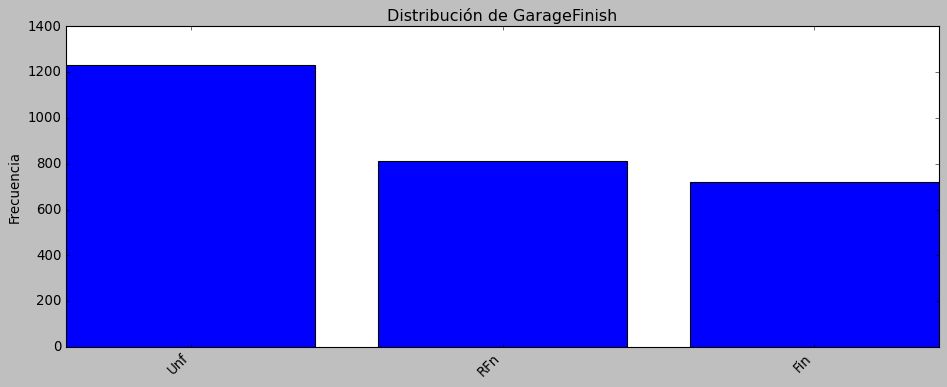

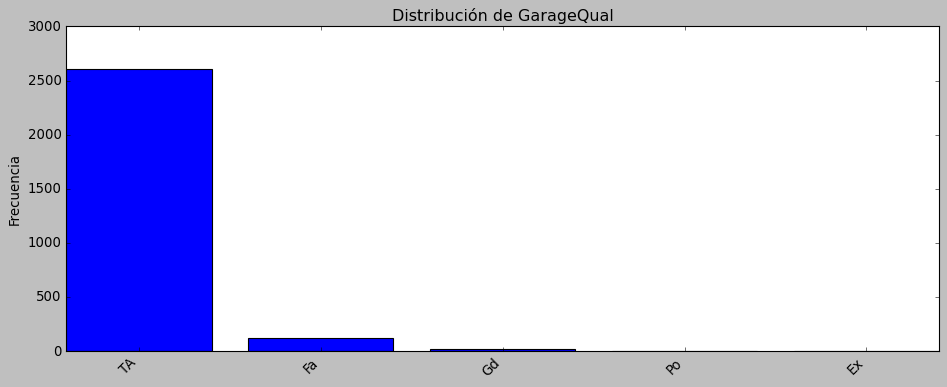

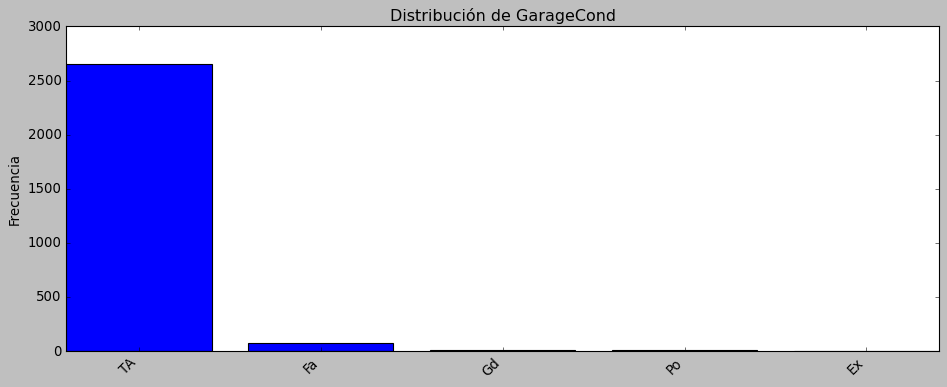

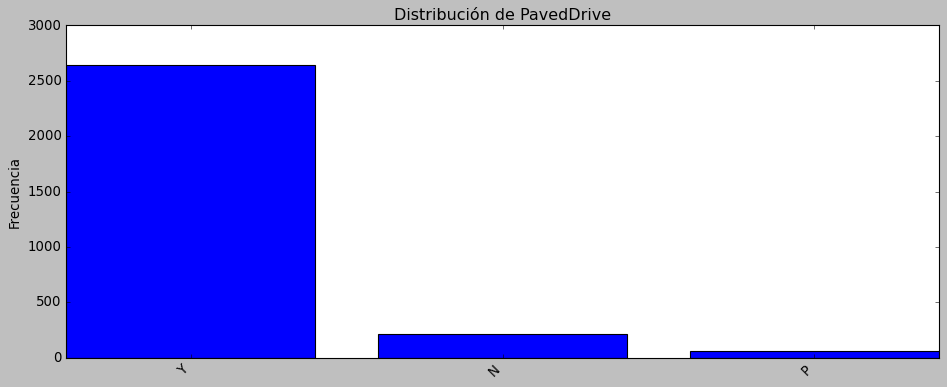

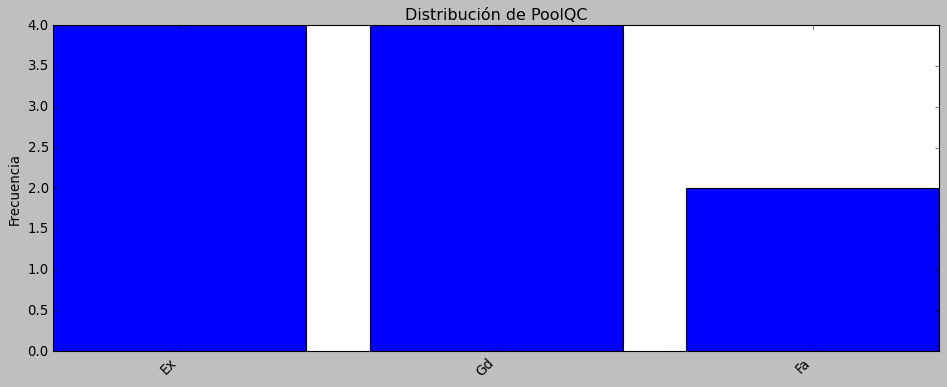

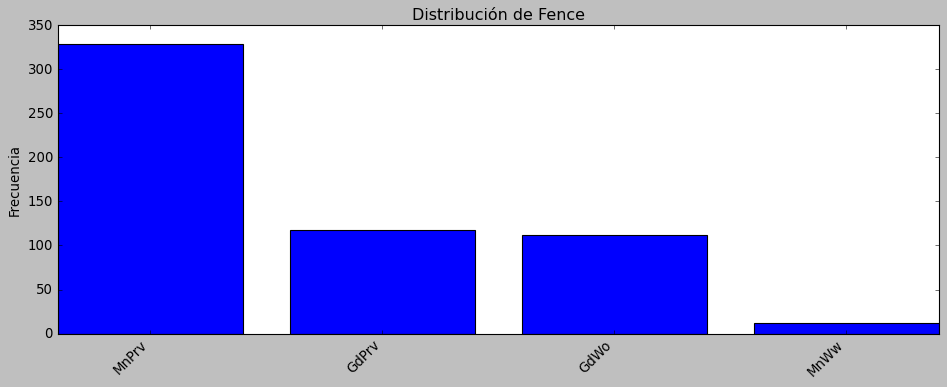

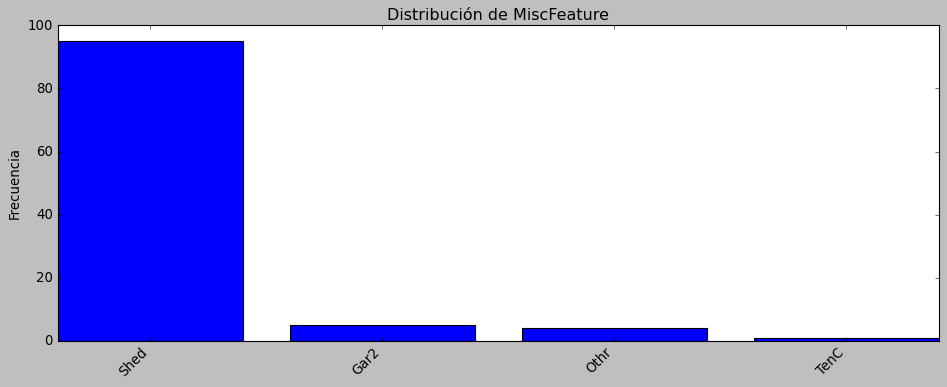

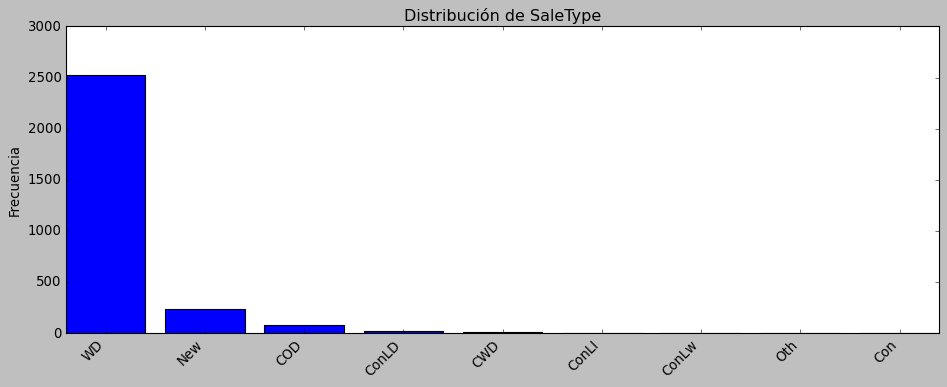

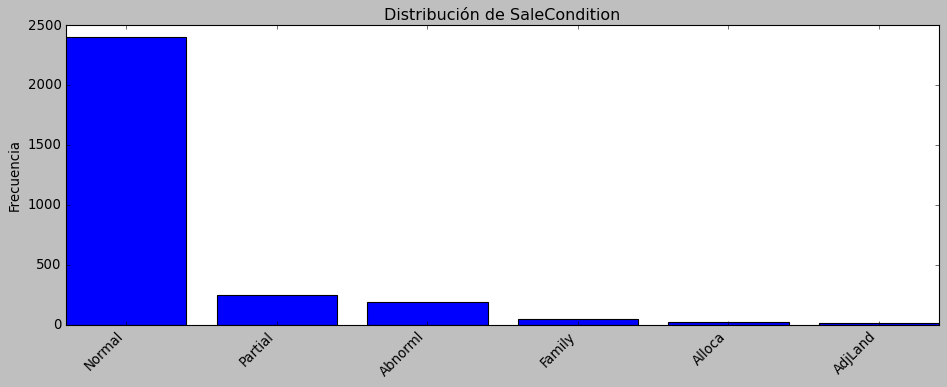

In [208]:
for categorica in categoricas:
    distribucion_categorica(df, categorica)

#### Análisis del impacto de variables categóricas en el precio
Este análisis busca entender cómo las diferentes características de una casa (por ejemplo, el barrio, el tipo de garaje, la calidad de la cocina, etc.) influyen en su precio de venta. Para ello, utilizamos las siguientes métricas:

1. **Ratio de precios**
Es una medida que compara el precio más alto con el precio más bajo dentro de una característica.
Ratio = precio más caro / Precio más barato
Cuanto mayor sea este ratio, más influencia tiene esta característica en el precio.

2. **Variabilidad**
Mide qué tan dispersos están los precios dentro de cada categoría.
Una variabilidad alta podría indicar que hay otros factores influyendo en el precio.

En definitiva:
| Nivel | Criterios | Interpretación |
|-------|-----------|----------------|
| MUY SIGNIFICATIVO | Ratio > 2 y Variabilidad ≤ 50% | La característica tiene una gran influencia en el precio y los precios son consistentes |
| MODERADO | Ratio > 1.5 y Variabilidad ≤ 50% | Tiene una influencia media y precios consistentes |
| BAJO | Ratio ≤ 1.5 o Variabilidad > 50% | Tiene poca influencia o los precios son muy variables |


In [210]:
def analizar_impacto_categoricas(df, categoricas):
    resultados = []
    
    for variable in categoricas:
        stats = df.groupby(variable)['SalePrice'].agg(['mean', 'std', 'count']).round(2)
        stats = stats.sort_values('mean', ascending=False)
        
        precio_ratio = stats['mean'].iloc[0] / stats['mean'].iloc[-1]
        variabilidad = (stats['std'] / stats['mean'] * 100).max()
        
        if precio_ratio > 2 and variabilidad <= 50:
            nivel = "MUY SIGNIFICATIVO"
        elif precio_ratio > 1.5 and variabilidad <= 50:
            nivel = "MODERADO"
        else:
            nivel = "BAJO"
        
        categoria_max = stats.index[0]
        categoria_min = stats.index[-1]
        
        resultados.append({
            'Variable': variable,
            'Descripcion': variables_dict.get(variable, 'No disponible'),
            'Impacto': nivel,
            'Ratio_Precios': precio_ratio,
            'Variabilidad': variabilidad,
            'N_Categorias': len(stats),
            'Categoria_Mayor_Precio': categoria_max,
            'Precio_Medio_Max': stats['mean'].iloc[0],
            'Std_Max': stats['std'].iloc[0],
            'N_Obs_Max': stats['count'].iloc[0],
            'Categoria_Menor_Precio': categoria_min,
            'Precio_Medio_Min': stats['mean'].iloc[-1],
            'Std_Min': stats['std'].iloc[-1],
            'N_Obs_Min': stats['count'].iloc[-1]
        })
    
    resultados_df = pd.DataFrame(resultados)
    
    orden_impacto = {'MUY SIGNIFICATIVO': 0, 'MODERADO': 1, 'BAJO': 2}
    resultados_df['Orden'] = resultados_df['Impacto'].map(orden_impacto)
    resultados_df = resultados_df.sort_values(['Orden', 'Ratio_Precios'], 
                                            ascending=[True, False])
    resultados_df = resultados_df.drop('Orden', axis=1)
    
    columnas_precio = ['Precio_Medio_Max', 'Precio_Medio_Min']
    resultados_df[columnas_precio] = resultados_df[columnas_precio].round(2)
    
    columnas_porcentaje = ['Variabilidad']
    resultados_df[columnas_porcentaje] = resultados_df[columnas_porcentaje].round(1)
    
    columnas_ratio = ['Ratio_Precios']
    resultados_df[columnas_ratio] = resultados_df[columnas_ratio].round(2)
    
    print("\nRESUMEN DE CLASIFICACIÓN:")
    print("-" * 30)
    resumen = resultados_df['Impacto'].value_counts().sort_index()
    for nivel, cantidad in resumen.items():
        print(f"{nivel}: {cantidad} variables")
    
    return resultados_df

resultados_df = analizar_impacto_categoricas(df, categoricas)
resultados_df


RESUMEN DE CLASIFICACIÓN:
------------------------------
BAJO: 21 variables
MODERADO: 9 variables
MUY SIGNIFICATIVO: 13 variables


,Variable,Descripcion,Impacto,Ratio_Precios,Variabilidad,N_Categorias,Categoria_Mayor_Precio,Precio_Medio_Max,Std_Max,N_Obs_Max,Categoria_Menor_Precio,Precio_Medio_Min,Std_Min,N_Obs_Min
18,ExterQual,Calidad del material exterior,MUY SIGNIFICATIVO,4.18,45.3,4,Ex,367360.96,116401.26,52,Fa,87985.21,39826.92,14
8,Neighborhood,Ubicaciones físicas dentro de los límites de l...,MUY SIGNIFICATIVO,3.40,41.1,25,NoRidge,335295.32,121412.66,41,MeadowV,98576.47,23491.05,17
10,Condition2,Proximidad a la carretera principal o ferrocar...,MUY SIGNIFICATIVO,3.36,49.7,8,PosA,325000.00,NaN,1,RRNn,96750.00,39951.53,2
22,BsmtCond,Condición general del sótano,MUY SIGNIFICATIVO,3.34,43.3,4,Gd,213599.91,72663.16,65,Po,64000.00,4242.64,2
30,KitchenQual,Calidad de la cocina,MUY SIGNIFICATIVO,3.11,36.8,4,Ex,328554.67,120862.94,100,Fa,105565.21,36004.25,39
0,MSZoning,Clasificación general de zonificación,MUY SIGNIFICATIVO,2.87,45.3,5,FV,214014.06,52369.66,65,C (all),74528.00,33791.09,10
21,BsmtQual,Altura del sótano,MUY SIGNIFICATIVO,2.83,34.7,4,Ex,327041.04,113563.24,121,Fa,115692.03,34469.67,35
29,Electrical,Sistema eléctrico,MUY SIGNIFICATIVO,2.79,42.7,5,SBrkr,186825.11,79856.46,1334,Mix,67000.00,NaN,1
32,FireplaceQu,Calidad de la chimenea,MUY SIGNIFICATIVO,2.60,40.3,5,Ex,337712.50,123611.47,24,Po,129764.15,31080.84,20
26,Heating,Tipo de calefacción,MUY SIGNIFICATIVO,2.51,47.1,6,GasA,182021.20,79262.87,1428,Floor,72500.00,NaN,1


In [211]:
# Variables muy significativas:
resultados_df[resultados_df['Impacto'] == 'MUY SIGNIFICATIVO']


,Variable,Descripcion,Impacto,Ratio_Precios,Variabilidad,N_Categorias,Categoria_Mayor_Precio,Precio_Medio_Max,Std_Max,N_Obs_Max,Categoria_Menor_Precio,Precio_Medio_Min,Std_Min,N_Obs_Min
18,ExterQual,Calidad del material exterior,MUY SIGNIFICATIVO,4.18,45.3,4,Ex,367360.96,116401.26,52,Fa,87985.21,39826.92,14
8,Neighborhood,Ubicaciones físicas dentro de los límites de l...,MUY SIGNIFICATIVO,3.40,41.1,25,NoRidge,335295.32,121412.66,41,MeadowV,98576.47,23491.05,17
10,Condition2,Proximidad a la carretera principal o ferrocar...,MUY SIGNIFICATIVO,3.36,49.7,8,PosA,325000.00,NaN,1,RRNn,96750.00,39951.53,2
22,BsmtCond,Condición general del sótano,MUY SIGNIFICATIVO,3.34,43.3,4,Gd,213599.91,72663.16,65,Po,64000.00,4242.64,2
30,KitchenQual,Calidad de la cocina,MUY SIGNIFICATIVO,3.11,36.8,4,Ex,328554.67,120862.94,100,Fa,105565.21,36004.25,39
0,MSZoning,Clasificación general de zonificación,MUY SIGNIFICATIVO,2.87,45.3,5,FV,214014.06,52369.66,65,C (all),74528.00,33791.09,10
21,BsmtQual,Altura del sótano,MUY SIGNIFICATIVO,2.83,34.7,4,Ex,327041.04,113563.24,121,Fa,115692.03,34469.67,35
29,Electrical,Sistema eléctrico,MUY SIGNIFICATIVO,2.79,42.7,5,SBrkr,186825.11,79856.46,1334,Mix,67000.00,NaN,1
32,FireplaceQu,Calidad de la chimenea,MUY SIGNIFICATIVO,2.60,40.3,5,Ex,337712.50,123611.47,24,Po,129764.15,31080.84,20
26,Heating,Tipo de calefacción,MUY SIGNIFICATIVO,2.51,47.1,6,GasA,182021.20,79262.87,1428,Floor,72500.00,NaN,1


## 6. Análisis de relaciones entre variables

### 6.1 Matriz de correlación (Correlaciones fuertes con el precio (SalePrice))

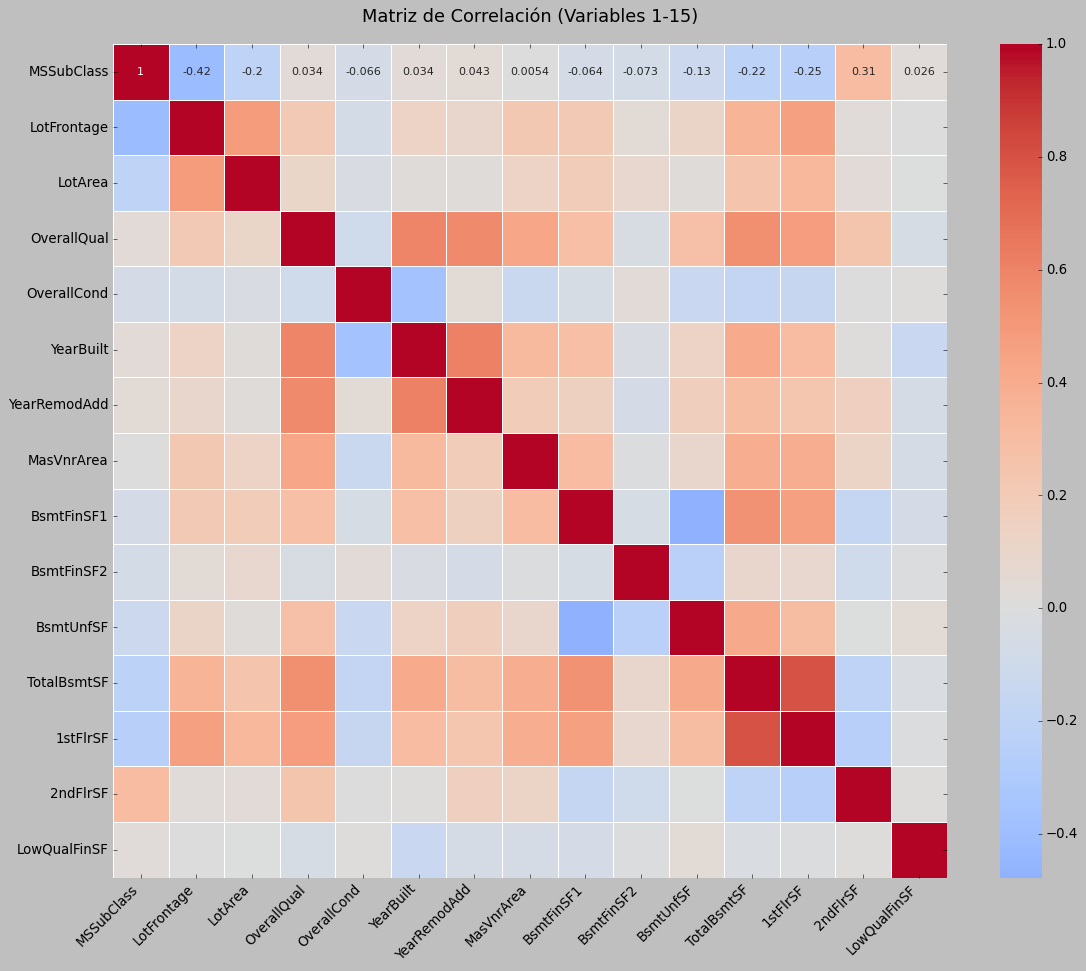

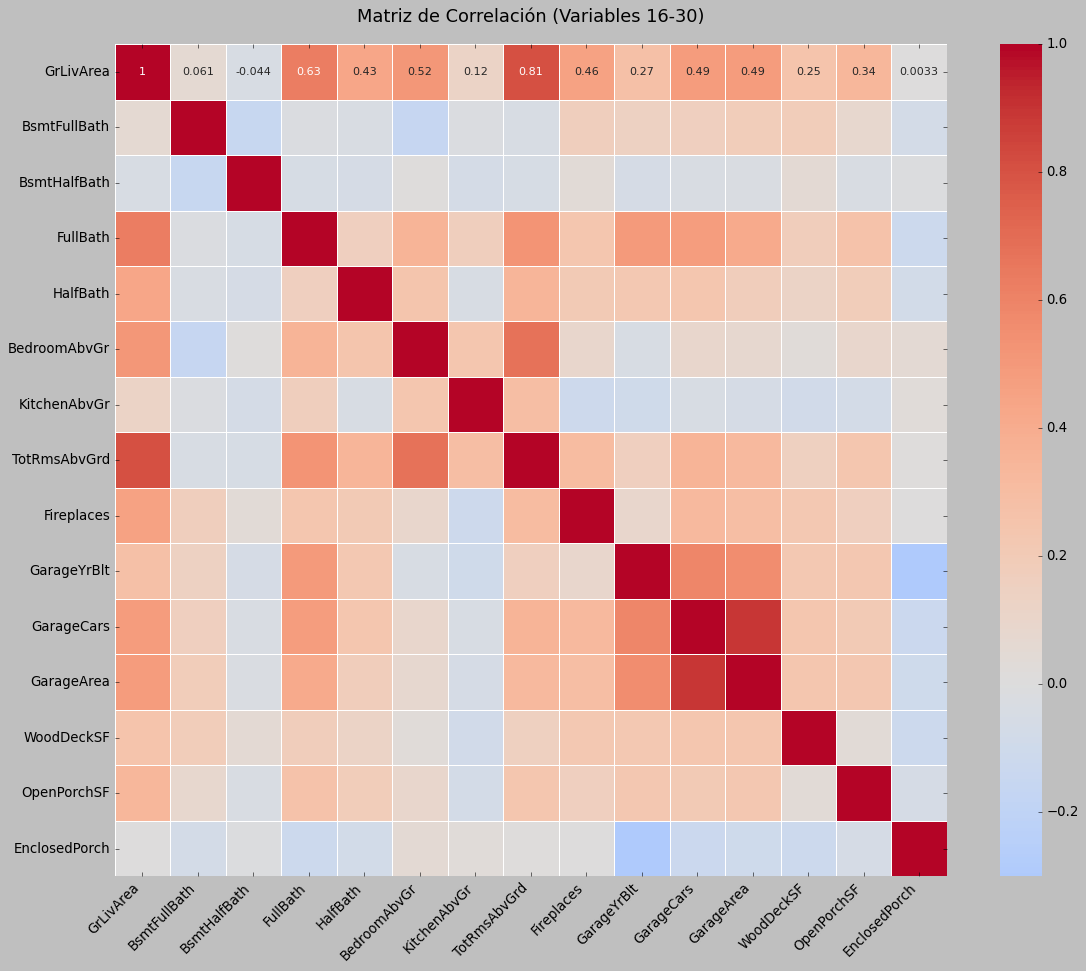

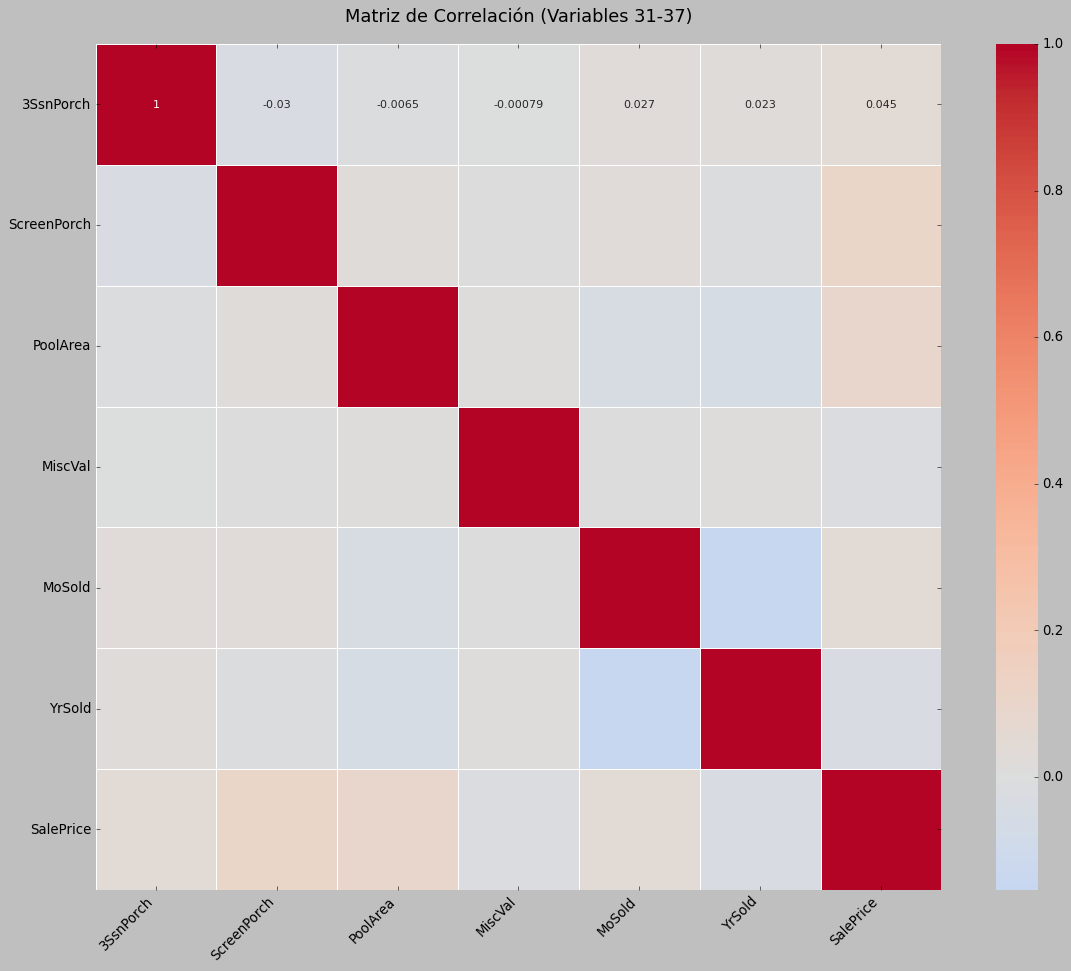

In [214]:
def analizar_matriz_correlacion_dividida(df, numericas, max_vars=15):
    matriz_corr = df[numericas].corr()
    
    # Si hay más variables que max_vars, dividir en submatrices
    if len(numericas) > max_vars:
        for i in range(0, len(numericas), max_vars):
            vars_subset = numericas[i:i+max_vars]
            
            submatriz = matriz_corr.loc[vars_subset, vars_subset]
            
            plt.figure(figsize=(15, 12))
            sns.heatmap(submatriz,
                       annot=True,
                       fmt='.2g',
                       cmap='coolwarm',
                       center=0,
                       square=True,
                       linewidths=.5,
                       annot_kws={"size": 10})
            
            plt.title(f'Matriz de Correlación (Variables {i+1}-{i+len(vars_subset)})', 
                     pad=20, size=16)
            plt.xticks(rotation=45, ha='right', size=12)
            plt.yticks(rotation=0, size=12)
            plt.tight_layout()
            plt.show()
    
    return matriz_corr

matriz_corr = analizar_matriz_correlacion_dividida(df, numericas)

**CONCLUSIONES SOBRE LA MATRIZ**

1. **Los colores indican**:
   - **Rojo**: Correlación positiva (cuando una variable aumenta, la otra también)
   - **Azul**: Correlación negativa (cuando una variable aumenta, la otra disminuye)
   - **Blanco/Gris claro**: Correlación cercana a cero (no hay relación lineal)
   - La intensidad del color indica la fuerza de la correlación

**Correlaciones fuertes con el precio (SalePrice) y ya análizadas en pasos anteriores:**

1. **Variables muy correlacionadas positivamente** (> 0.6):
   - `OverallQual`: La calidad general de la casa
   - `GrLivArea`: Área habitable sobre el suelo
   - `GarageArea` y `GarageCars`: Tamaño del garaje
   - `TotalBsmtSF`: Área total del sótano

2. **Variables moderadamente correlacionadas** (0.4 - 0.6):
   - `YearBuilt`: Año de construcción
   - `FullBath`: Número de baños completos
   - `TotRmsAbvGrd`: Total de habitaciones sobre el suelo
   - `YearRemodAdd`: Año de remodelación

**Correlaciones importantes entre variables: (Análisis de multicolinealidad)**

1. **Correlaciones muy altas** (potencial multicolinealidad):
   - `GarageArea` - `GarageCars`: Lógico ya que representan el mismo concepto
   - `TotalBsmtSF` - `1stFlrSF`: El área del primer piso suele estar relacionada con el sótano
   - `GrLivArea` - `TotRmsAbvGrd`: El área habitable está relacionada con el número de habitaciones

2. **Correlaciones negativas significativas**:
   - `YearBuilt` con variables de condición antigua
   - Variables de edad con calidad general

### 6.2 Análisis de relaciones no lineales

ANÁLISIS DE RELACIONES NO LINEALES
--------------------------------------------------

Variable: LotArea
Correlación Pearson: 0.264
Correlación Spearman: 0.456
Diferencia: 0.193


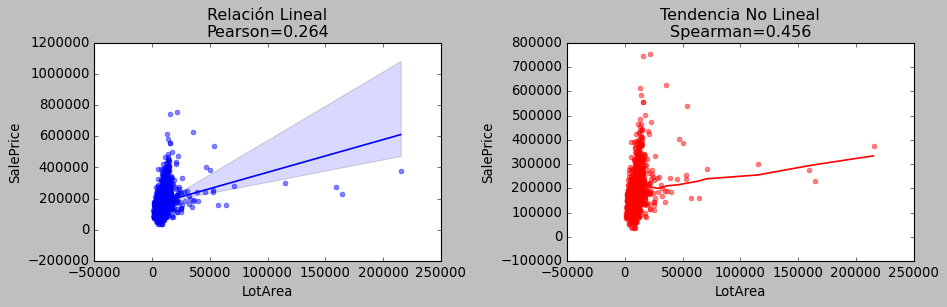

→ Existe una relación no lineal significativa
→ Relación NO LINEAL DÉBIL

Variable: OpenPorchSF
Correlación Pearson: 0.316
Correlación Spearman: 0.478
Diferencia: 0.162


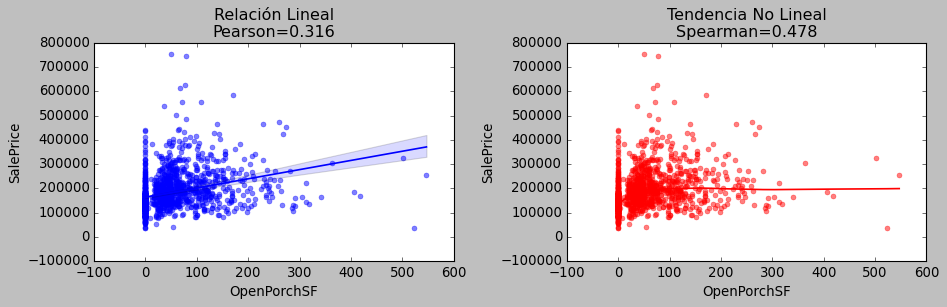

→ Existe una relación no lineal significativa
→ Relación NO LINEAL DÉBIL

Variable: YearBuilt
Correlación Pearson: 0.523
Correlación Spearman: 0.653
Diferencia: 0.130


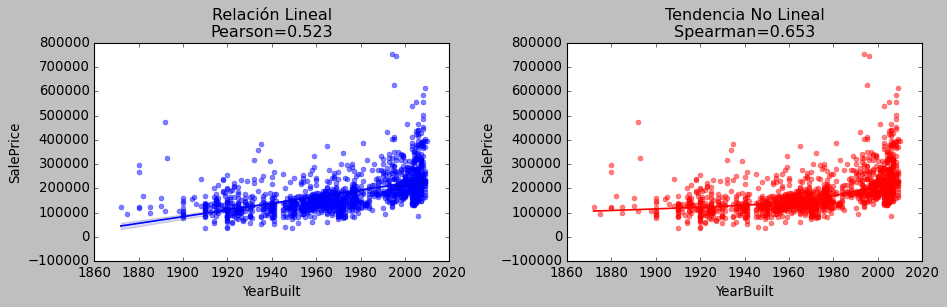

→ Existe una relación no lineal significativa
→ Relación NO LINEAL DÉBIL

Variable: GarageYrBlt
Correlación Pearson: 0.486
Correlación Spearman: 0.594
Diferencia: 0.107


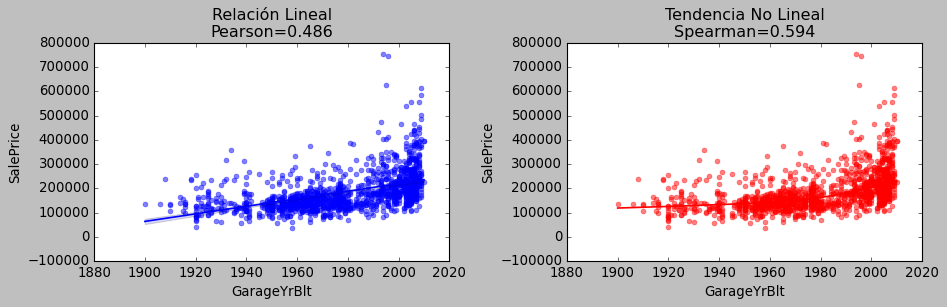

→ Existe una relación no lineal significativa
→ Relación NO LINEAL DÉBIL

INTERPRETACIÓN:
- Una gran diferencia entre Spearman y Pearson indica no linealidad
- Spearman > Pearson sugiere relación monótona no lineal
- La línea roja (LOWESS) muestra la tendencia no lineal de los datos

CLASIFICACIÓN:
- Diferencia > 0.3: Relación no lineal fuerte
- Diferencia > 0.2: Relación no lineal moderada
- Diferencia > 0.1: Relación no lineal débil


In [217]:
def analizar_relaciones_no_lineales(df, variable_objetivo='SalePrice'):
    # Seleccionar variables numéricas
    numericas = df.select_dtypes(include=['int64', 'float64']).columns
    numericas = numericas.drop(variable_objetivo)
    
    resultados = []
    
    for variable in numericas:
        # Calcular correlaciones
        pearson = df[variable].corr(df[variable_objetivo])
        spearman = df[variable].corr(df[variable_objetivo], method='spearman')
        diferencia = abs(spearman - pearson)
        
        resultados.append({
            'Variable': variable,
            'Pearson': pearson,
            'Spearman': spearman,
            'Diferencia': diferencia
        })
    
    # Convertir a DataFrame y ordenar por diferencia
    resultados_df = pd.DataFrame(resultados)
    resultados_df = resultados_df.sort_values('Diferencia', ascending=False)
    
    # Mostrar resultados
    print("ANÁLISIS DE RELACIONES NO LINEALES")
    print("-" * 50)
    
    # Clasificar relaciones
    for _, row in resultados_df.iterrows():
        if row['Diferencia'] > 0.1:  # Umbral para mostrar solo diferencias significativas
            print(f"\nVariable: {row['Variable']}")
            print(f"Correlación Pearson: {row['Pearson']:.3f}")
            print(f"Correlación Spearman: {row['Spearman']:.3f}")
            print(f"Diferencia: {row['Diferencia']:.3f}")
            
            # Visualizar la relación
            plt.figure(figsize=(12, 4))
            
            # Scatter plot con regresión lineal
            plt.subplot(1, 2, 1)
            sns.regplot(data=df, x=row['Variable'], y=variable_objetivo, 
                       scatter_kws={'alpha':0.5}, color='blue')
            plt.title(f'Relación Lineal\nPearson={row["Pearson"]:.3f}')
            
            # Scatter plot con LOWESS
            plt.subplot(1, 2, 2)
            sns.regplot(data=df, x=row['Variable'], y=variable_objetivo, 
                       scatter_kws={'alpha':0.5}, lowess=True, color='red')
            plt.title(f'Tendencia No Lineal\nSpearman={row["Spearman"]:.3f}')
            
            plt.tight_layout()
            plt.show()
            
            # Interpretar el tipo de relación
            if abs(row['Pearson']) > abs(row['Spearman']):
                print("→ La relación es más fuerte de forma lineal")
            else:
                print("→ Existe una relación no lineal significativa")
            
            if row['Diferencia'] > 0.3:
                print("→ Relación NO LINEAL FUERTE")
            elif row['Diferencia'] > 0.2:
                print("→ Relación NO LINEAL MODERADA")
            else:
                print("→ Relación NO LINEAL DÉBIL")
                
    print("\nINTERPRETACIÓN:")
    print("- Una gran diferencia entre Spearman y Pearson indica no linealidad")
    print("- Spearman > Pearson sugiere relación monótona no lineal")
    print("- La línea roja (LOWESS) muestra la tendencia no lineal de los datos")
    print("\nCLASIFICACIÓN:")
    print("- Diferencia > 0.3: Relación no lineal fuerte")
    print("- Diferencia > 0.2: Relación no lineal moderada")
    print("- Diferencia > 0.1: Relación no lineal débil")
    
    return resultados_df

# Usar el método
resultados = analizar_relaciones_no_lineales(df)

**Conclusiones de las variables con Relaciones No Lineales Moderadas:**

1. **LotArea** (Tamaño del lote):
   - La relación entre el tamaño del lote y el precio no es proporcional
   - Los aumentos en el tamaño del lote no se traducen en aumentos proporcionalmente lineales en el precio
   - Puede indicar que hay un "punto óptimo" de tamaño

2. **OpenPorchSF** (Área del porche abierto):
   - El impacto del tamaño del porche en el precio varía según el rango
   - Posiblemente hay un tamaño "ideal" de porche más allá del cual el valor añadido disminuye

3. **YearBuilt** (Año de construcción):
   - La edad de la casa no afecta al precio de manera lineal
   - Puede haber "períodos históricos" que afectan al precio de manera diferente
   - Casas muy antiguas podrían tener un valor histórico adicional

4. **GarageYrBlt** (Año de construcción del garaje):
   - Similar a YearBuilt, la antigüedad del garaje tiene un efecto no lineal
   - Podría estar relacionado con diferentes estilos y calidades de construcción según la época

### 6.3 Conclusiones de los análisis

**1. Variables Redundantes a Tratar**

- **Garaje**
    -  Eliminar una de estas: `GarageCars` o `GarageArea`(Decidimos mantener `GarageCars` por ser más interpretable)

- **Áreas de la Casa**
    - Dada  correlación entre `TotalBsmtSF` y `1stFlrSF` crearemos una variable compuesta de área total

- **Habitaciones y Área**
    - Eliminar una de estas: `GrLivArea` y `TotRmsAbvGrd (Decidimos mantener `GrLivArea` por ser más precisa)

- **Años**
    - `YearBuilt` y `GarageYrBlt` muestran alta correlación: Mantendremos `YearBuilt` y crearemos una variable de diferencia si el garaje es más nuevo

**2. Transformaciones Necesarias para variables No Lineales**

- **LotArea**
    - Aplicar transformación logarítmica
    - Ayudará a linearizar la relación con el precio

- **OpenPorchSF**
   - Considerar transformación por raíz cuadrada

- **YearBuilt**
   - Crear variables dummy por períodos históricos

- **GarageYrBlt**
   - Convertir a edad del garaje (Crear indicador si es más nuevo que la casa)

## 7. Preparación de datos

In [222]:
#copy_df = df
#df = copy_df

### 7.1 Manejo de valores faltantes

**En el análisis anterior habíamos obtenido que:**

**Variables con más del 50% de valores faltantes:**
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

**Variables con 20-50% de valores faltantes:**
['FireplaceQu', 'SalePrice']

**Variables con menos del 20% de valores faltantes:**
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

**Decidimos que:**
 - Eliminamos las variables con más del 50% de valores faltantes. Ya que cualquier imputación prodría considerarse "invención" más que "predicción"
 - Seguiremos el siguiente criterio de **imputación**:
    - **Variables de área:**
   
          variables_mediana = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

          - LotFrontage: El frente del lote suele seguir patrones del vecindario
          - MasVnrArea: Área de revestimiento, relacionada con el tamaño de la casa
          - GarageYrBlt: Año de construcción del garaje, relacionado con la edad de la casa

    - **Variables de calidad: 'NA' (indica ausencia "No Aplica")**
  
          variables_calidad = ['FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtQual', 
                    'BsmtCond', 'ExterQual', 'ExterCond']
  
          - Un valor faltante aquí generalmente significa que el elemento no existe
          - Ejemplo: No tiene sentido asignar una calidad de garaje si no hay garaje
      
    - **Variables de tipo: Moda (valor más común)**

            variables_tipo = ['GarageType', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
                 'KitchenQual', 'SaleType', 'Exterior1st', 'Exterior2nd']
  
          - En características categóricas, representa la opción más común
          - Ejemplo: Si falta el tipo de garaje, es razonable asumir el tipo más común en el vecindario
  
   - **Variables Específicas (Valores Predefinidos)**
  
            variables_especificas = {'BsmtExposure': 'No','GarageFinish': 'No'}
  
         - Indica ausencia específica (Valor faltante sugiere que la característica no existe)
  
     
    - **Variables numéricas relacionadas con sótano/garaje: 0 (ausencia lógica)**
   
            variables_cero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                 'GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']
  
          - Cero es lógicamente correcto para área/cantidad cuando el elemento no existe

In [226]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [227]:
def eliminar_columna_si_existe(df, nombre_columna):
    if nombre_columna in df.columns:
        df = df.drop(columns=[nombre_columna])
    return df

In [228]:
def imputar_valores_faltantes(df):
    df_imp = df.copy()
    
    # 1. Eliminar variables con más del 50% de valores faltantes
    variables_eliminar = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
    df_imp = df.drop(columns=[col for col in variables_eliminar if col in df.columns])
    
    print(f"Variables eliminadas: {variables_eliminar}")
    
    # 2. Imputación específica para cada tipo de variable
    
    # Variables numéricas relacionadas con área/tamaño
    variables_mediana = [
        'LotFrontage',    # Frente del lote
        'MasVnrArea',     # Área de revestimiento
        'SalePrice'       # Añadir SalePrice aquí si es necesario imputar
    ]
    for col in variables_mediana:
        if col in df_imp.columns:
            df_imp[col] = df_imp[col].fillna(df_imp[col].median())
            print(f"Imputado {col} con mediana: {df_imp[col].median():.2f}")
    
    # Variables categóricas relacionadas con calidad/condición
    variables_calidad = [
        'FireplaceQu',    # Calidad chimenea
        'GarageQual',     # Calidad garaje
        'GarageCond',     # Condición garaje
        'BsmtQual',       # Calidad sótano
        'BsmtCond',       # Condición sótano
        'ExterQual',      # Calidad exterior
        'ExterCond'       # Condición exterior
    ]
    for col in variables_calidad:
        if col in df_imp.columns:
            df_imp[col] = df_imp[col].fillna('NA')  # NA = Not Available
    
    # Variables categóricas relacionadas con tipo
    variables_tipo = [
        'MSZoning',       # Zonificación
        'Utilities',      # Servicios públicos
        'GarageType',     # Tipo de garaje
        'BsmtFinType1',   # Tipo acabado sótano 1
        'BsmtFinType2',   # Tipo acabado sótano 2
        'Electrical',     # Sistema eléctrico
        'KitchenQual',    # Calidad cocina
        'Functional',     # Funcionalidad
        'SaleType',       # Tipo de venta
        'Exterior1st',    # Revestimiento exterior 1
        'Exterior2nd',     # Revestimiento exterior 2
        'GarageFinish'
    ]
    for col in variables_tipo:
        if col in df_imp.columns:
            df_imp[col] = df_imp[col].fillna(df_imp[col].mode()[0])
            print(f"Imputado {col} con moda: {df_imp[col].mode()[0]}")
    
    # Variables específicas de sótano/garaje
    variables_especificas = {
        'BsmtExposure': 'No',      # Exposición del sótano
        'GarageFinish': 'No'       # Acabado del garaje
    }
    for col, valor in variables_especificas.items():
        if col in df_imp.columns:
            df_imp[col] = df_imp[col].fillna(valor)
    
    # Variables numéricas que deben ser 0 cuando no existe la característica
    variables_cero = [
        'BsmtFinSF1',     # Área acabada sótano 1
        'BsmtFinSF2',     # Área acabada sótano 2
        'BsmtUnfSF',      # Área sin acabar sótano
        'TotalBsmtSF',    # Área total sótano
        'GarageArea',     # Área garaje
        'GarageCars',     # Capacidad garaje
        'BsmtFullBath',   # Baños completos sótano
        'BsmtHalfBath',   # Medios baños sótano
        'GarageYrBlt'
    ]
    for col in variables_cero:
        if col in df_imp.columns:
            df_imp[col] = df_imp[col].fillna(0)
    
    # Variables objetivo (no imputar si son datos de test)
    variables_objetivo = ['SalePrice', 'Segmento_Precio']
    for col in variables_objetivo:
        if col in df_imp.columns and df_imp[col].isnull().sum() > 0:
            print(f"\nNota: {col} contiene valores nulos (probablemente datos de test)")
    
    # Verificar resultado de la imputación
    missing_despues = df_imp.isnull().sum()
    missing_significativo = missing_despues[missing_despues > 0]
    
    if len(missing_significativo) > 0:
        print("\nATENCIÓN: Aún quedan valores faltantes en:")
        print(missing_significativo)
    else:
        print("\nImputación completada exitosamente")
    
    # Guardar y mostrar información sobre la imputación
    imputacion_info = {
        'variables_eliminadas': variables_eliminar,
        'variables_mediana': variables_mediana,
        'variables_calidad': variables_calidad,
        'variables_tipo': variables_tipo,
        'variables_especificas': variables_especificas,
        'variables_cero': variables_cero,
        'variables_objetivo': variables_objetivo
    }
    
    # Mostrar resumen detallado
    print("\nRESUMEN DE LA IMPUTACIÓN:")
    print("-"*50)
    print(f"\n1. Variables eliminadas: {len(variables_eliminar)}")
    print(f"2. Variables imputadas con mediana: {len(variables_mediana)}")
    print(f"3. Variables de calidad imputadas con 'NA': {len(variables_calidad)}")
    print(f"4. Variables de tipo imputadas con moda: {len(variables_tipo)}")
    print(f"5. Variables específicas con valores predefinidos: {len(variables_especificas)}")
    print(f"6. Variables numéricas imputadas con 0: {len(variables_cero)}")
    
    # Verificar cambios en el DataFrame
    print("\nCAMBIOS EN EL DATASET:")
    print(f"Dimensiones originales: {df.shape}")
    print(f"Dimensiones después de imputación: {df_imp.shape}")
    
    return df_imp, imputacion_info

# Ejecutar imputación
df_imputado, info_imputacion = imputar_valores_faltantes(df)

Variables eliminadas: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Imputado LotFrontage con mediana: 68.00
Imputado MasVnrArea con mediana: 0.00
Imputado SalePrice con mediana: 163000.00
Imputado MSZoning con moda: RL
Imputado Utilities con moda: AllPub
Imputado GarageType con moda: Attchd
Imputado BsmtFinType1 con moda: Unf
Imputado BsmtFinType2 con moda: Unf
Imputado Electrical con moda: SBrkr
Imputado KitchenQual con moda: TA
Imputado Functional con moda: Typ
Imputado SaleType con moda: WD
Imputado Exterior1st con moda: VinylSd
Imputado Exterior2nd con moda: VinylSd
Imputado GarageFinish con moda: Unf

Imputación completada exitosamente

RESUMEN DE LA IMPUTACIÓN:
--------------------------------------------------

1. Variables eliminadas: 5
2. Variables imputadas con mediana: 3
3. Variables de calidad imputadas con 'NA': 7
4. Variables de tipo imputadas con moda: 12
5. Variables específicas con valores predefinidos: 2
6. Variables numéricas imputadas con 0: 9

CAMBIOS E

In [229]:
df_imputado.columns[df_imputado.isnull().any()]

Index([], dtype='object')

In [230]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [231]:
df = df_imputado

In [232]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [233]:
df_copy= df

### 7.2 Transformación de variables

Dado los análisis anteriores sabíamos que debíamos aplicar transformaciones a las variables de las relaciones no lineales y a aquellas que tenían una asímetria alta o extrema

In [236]:
def aplicar_transformaciones(df, verbose=True):

    # Variables a transformar basadas en análisis de asimetría
    variables_log = [
        'LotArea',        # Alta asimetría, valores de área
        'MiscVal',        # Valores monetarios, alta asimetría
        'PoolArea',       # Área, alta asimetría
        'LowQualFinSF',   # Área, alta asimetría
        'BsmtFinSF2',     # Área del sótano
        'EnclosedPorch',  # Área del porche
        'ScreenPorch',    # Área del porche
        'GrLivArea',      # Área habitable, generalmente asimétrica
        'TotalBsmtSF',    # Área total del sótano
        '1stFlrSF',       # Área del primer piso
        'SalePrice'       # Variable objetivo, alta asimetría
    ]

    variables_sqrt = [
        'OpenPorchSF',    # Área con asimetría moderada
        '3SsnPorch',      # Área con asimetría moderada
        'WoodDeckSF',     # Área con asimetría moderada
        'GarageArea'      # Área con asimetría moderada
    ]
    
    df_trans = df.copy(deep=True)
    transformation_info = {
        'log_transformed': [],
        'sqrt_transformed': [],
        'temporal_features': [],
        'warnings': []
    }
    
    # Validación inicial
    def validar_datos_numericos(df, columnas):
        """Valida que las columnas sean numéricas y no tengan valores negativos."""
        for col in columnas:
            if col in df.columns:
                if not np.issubdtype(df[col].dtype, np.number):
                    raise ValueError(f"La columna {col} debe ser numérica")
                if (df[col] < 0).any():
                    raise ValueError(f"La columna {col} contiene valores negativos")

    try:
        validar_datos_numericos(df_trans, variables_log + variables_sqrt)
    except ValueError as e:
        print(f"Error en la validación: {e}")
        return df_trans, None, transformation_info
    
    # Función para aplicar transformación logarítmica de manera segura
    def log_transform(x):
        """Aplica transformación logarítmica con manejo de ceros."""
        return np.log1p(x)
    
    # Función para calcular el score de normalidad
    def normalidad_score(serie):
        """Calcula un score de normalidad basado en el test de Shapiro-Wilk."""
        if len(serie) < 3:
            return 0
        try:
            statistic, _ = stats.shapiro(serie.sample(min(5000, len(serie))))
            return statistic
        except:
            return 0
    
    # Aplicar transformaciones y guardar resultados
    resultados_asimetria = []
    
    # Transformaciones Logarítmicas
    for var in variables_log:
        if var in df_trans.columns:
            # Guardar estadísticas originales
            orig_skew = df_trans[var].skew()
            orig_norm = normalidad_score(df_trans[var])
            
            # Aplicar transformación
            df_trans[f'{var}_Log'] = log_transform(df_trans[var])
            transformation_info['log_transformed'].append(var)
            
            # Guardar estadísticas post-transformación
            trans_skew = df_trans[f'{var}_Log'].skew()
            trans_norm = normalidad_score(df_trans[f'{var}_Log'])
            
            resultados_asimetria.append({
                'Variable': var,
                'Tipo_Transformacion': 'Log',
                'Asimetria_Original': round(orig_skew, 3),
                'Asimetria_Transformada': round(trans_skew, 3),
                'Normalidad_Original': round(orig_norm, 3),
                'Normalidad_Transformada': round(trans_norm, 3),
                'Mejora_Asimetria': round(abs(orig_skew) - abs(trans_skew), 3)
            })
    
    # Transformaciones Raíz Cuadrada
    for var in variables_sqrt:
        if var in df_trans.columns:
            # Guardar estadísticas originales
            orig_skew = df_trans[var].skew()
            orig_norm = normalidad_score(df_trans[var])
            
            # Aplicar transformación
            df_trans[f'{var}_Sqrt'] = np.sqrt(df_trans[var])
            transformation_info['sqrt_transformed'].append(var)
            
            # Guardar estadísticas post-transformación
            trans_skew = df_trans[f'{var}_Sqrt'].skew()
            trans_norm = normalidad_score(df_trans[f'{var}_Sqrt'])
            
            resultados_asimetria.append({
                'Variable': var,
                'Tipo_Transformacion': 'Sqrt',
                'Asimetria_Original': round(orig_skew, 3),
                'Asimetria_Transformada': round(trans_skew, 3),
                'Normalidad_Original': round(orig_norm, 3),
                'Normalidad_Transformada': round(trans_norm, 3),
                'Mejora_Asimetria': round(abs(orig_skew) - abs(trans_skew), 3)
            })
    
    # Transformaciones Temporales
    if 'YrSold' in df_trans.columns:
        año_referencia = df_trans['YrSold'].max()
        
        # Edad de la casa
        if 'YearBuilt' in df_trans.columns:
            df_trans['Age'] = año_referencia - df_trans['YearBuilt']
            df_trans['Age_Squared'] = df_trans['Age'] ** 2
            transformation_info['temporal_features'].extend(['Age', 'Age_Squared'])
        
        # Edad del garaje
        if 'GarageYrBlt' in df_trans.columns:
            df_trans['GarageAge'] = año_referencia - df_trans['GarageYrBlt']
            df_trans.loc[df_trans['GarageAge'] < 0, 'GarageAge'] = 0  # Corregir valores negativos
            df_trans['GarageAge'] = df_trans['GarageAge'].fillna(df_trans['Age'])
            df_trans['GarageAge_Squared'] = df_trans['GarageAge'] ** 2
            transformation_info['temporal_features'].extend(['GarageAge', 'GarageAge_Squared'])
        
        # Tiempo desde remodelación
        if 'YearRemodAdd' in df_trans.columns:
            df_trans['RemodAge'] = año_referencia - df_trans['YearRemodAdd']
            df_trans['IsRemodeled'] = (df_trans['YearRemodAdd'] != df_trans['YearBuilt']).astype(int)
            transformation_info['temporal_features'].extend(['RemodAge', 'IsRemodeled'])
    
    # Crear DataFrame con resultados
    resultados_df = pd.DataFrame(resultados_asimetria)
    
    if verbose:
        # Mostrar resultados
        print("\nRESULTADOS DE LAS TRANSFORMACIONES:")
        print("="*80)
        print(resultados_df.to_string(index=False))
        
        # Mostrar resumen
        print("\nRESUMEN:")
        print("-"*80)
        print(f"Variables transformadas: {len(variables_log + variables_sqrt)}")
        print(f"- Transformaciones logarítmicas: {len(variables_log)}")
        print(f"- Transformaciones raíz cuadrada: {len(variables_sqrt)}")
        print(f"- Características temporales creadas: {len(transformation_info['temporal_features'])}")
        
        mejoras = resultados_df['Mejora_Asimetria'] > 0
        print(f"\nTransformaciones efectivas: {sum(mejoras)} de {len(resultados_df)}")
        
        # Mostrar las transformaciones más y menos efectivas
        if len(resultados_df) > 0:
            mejor_trans = resultados_df.loc[resultados_df['Mejora_Asimetria'].idxmax()]
            peor_trans = resultados_df.loc[resultados_df['Mejora_Asimetria'].idxmin()]
            
            print(f"\nMejor transformación: {mejor_trans['Variable']} ")
            print(f"- Mejora en asimetría: {mejor_trans['Mejora_Asimetria']:.3f}")
            print(f"\nPeor transformación: {peor_trans['Variable']}")
            print(f"- Mejora en asimetría: {peor_trans['Mejora_Asimetria']:.3f}")
    
    return df_trans, resultados_df, transformation_info

In [237]:
df_transformado, resultados, info_transformaciones = aplicar_transformaciones(df_imputado)


RESULTADOS DE LAS TRANSFORMACIONES:
     Variable Tipo_Transformacion  Asimetria_Original  Asimetria_Transformada  Normalidad_Original  Normalidad_Transformada  Mejora_Asimetria
      LotArea                 Log              12.829                  -0.505                    0                        0            12.324
      MiscVal                 Log              21.958                   5.217                    0                        0            16.742
     PoolArea                 Log              16.907                  15.006                    0                        0             1.901
 LowQualFinSF                 Log              12.095                   8.562                    0                        0             3.533
   BsmtFinSF2                 Log               4.148                   2.464                    0                        0             1.685
EnclosedPorch                 Log               4.006                   1.962                    0             

In [238]:
df_transformado.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF_Sqrt,3SsnPorch_Sqrt,WoodDeckSF_Sqrt,GarageArea_Sqrt,Age,Age_Squared,GarageAge,GarageAge_Squared,RemodAge,IsRemodeled
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,7.81025,0.0,0.000000,23.409400,7,49,7.0,49.0,7,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0.00000,0.0,17.262677,21.447611,34,1156,34.0,1156.0,34,0


In [239]:
df_transformado.columns[df_transformado.isnull().any()]

Index([], dtype='object')

In [240]:
df_transformado.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [241]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0


In [242]:
df=df_transformado

In [243]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ss

### 7.3 Codificación de variables categóricas

1. Variables Ordinales (con orden) -> Método: **Números secuenciales** 
    - ordinales = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'LandSlope', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']
    
2. Variables con Pocas Categorías (<10) -> Método: **One-Hot enconding**
    - pocas_categorias = ['Street', 'LotShape', 'Utilities', 'BldgType', 'CentralAir', 'PavedDrive', 'RoofStyle', 'Foundation', 'Heating', 'Electrical', 'SaleType', 'SaleCondition']
   
3. Variables con Muchas Categorías (≥10) -> Método: **Label Encoding (un número por categoría)**
    - muchas_categorias = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'GarageType', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl']
   
4. Categorías Raras (<5% frecuencia) -> Método: **Agrupar en categoría "Otros"/"Rare"**
    - categorias_raras = ['Condition2', 'RoofMatl', 'Exterior2nd', 'MSSubClass', 'MiscFeature', 'Alley', 'Fence', 'PoolQC']

In [246]:
def encode_categorical_variables(df):
    df_encoded = df.copy()
    
    # Variables ordinales (tienen un orden inherente)
    ordinal_features = {
        'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
        'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
        'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
        'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
        'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
        'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
        'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
        'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
        'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
        'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
        'PavedDrive': {'Y': 3, 'P': 2, 'N': 1},
        'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
        'CentralAir': {'Y': 1, 'N': 0}
    }
    
    # Aplicar codificación ordinal
    for feature, mapping in ordinal_features.items():
        if feature in df_encoded.columns:
            df_encoded[feature] = df_encoded[feature].map(mapping)
            # Rellenar valores NA si existen
            if df_encoded[feature].isnull().any():
                df_encoded[feature] = df_encoded[feature].fillna(0)
    
    # Variables nominales (no tienen orden inherente)
    nominal_features = [
        'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'GarageType',
        'SaleType', 'SaleCondition'
    ]
    
    # Aplicar one-hot encoding a variables nominales
    for feature in nominal_features:
        if feature in df_encoded.columns:
            # Manejar valores NA
            df_encoded[feature] = df_encoded[feature].fillna('NA')
            
            # Crear variables dummy
            dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first=True)
            
            # Añadir las nuevas columnas al DataFrame
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            
            # Eliminar la columna original
            df_encoded.drop(feature, axis=1, inplace=True)
    
    # Codificar MSSubClass como categórica (aunque es numérica, representa categorías)
    if 'MSSubClass' in df_encoded.columns:
        df_encoded = pd.concat([
            df_encoded, 
            pd.get_dummies(df_encoded['MSSubClass'], prefix='MSSubClass', drop_first=True)
        ], axis=1)
        df_encoded.drop('MSSubClass', axis=1, inplace=True)

    return df_encoded

# Función auxiliar para mostrar información sobre la codificación
def print_encoding_summary(df_original, df_encoded):
    """
    Muestra un resumen de los cambios realizados en la codificación.
    """
    print("Resumen de la codificación:")
    print(f"Dimensiones originales: {df_original.shape}")
    print(f"Dimensiones después de la codificación: {df_encoded.shape}")
    print(f"Nuevas columnas creadas: {df_encoded.shape[1] - df_original.shape[1]}")
    
    # Mostrar columnas categóricas que fueron codificadas
    original_cols = set(df_original.columns)
    new_cols = set(df_encoded.columns)
    removed_cols = original_cols - new_cols
    added_cols = new_cols - original_cols
    
    print("\nColumnas categóricas procesadas:")
    print(sorted(list(removed_cols)))
    
    print("\nPrimeras 5 nuevas columnas dummy creadas:")
    print(sorted(list(added_cols))[:5])

In [247]:
df_encoded = encode_categorical_variables(df)
print_encoding_summary(df, df_encoded)

Resumen de la codificación:
Dimensiones originales: (2919, 97)
Dimensiones después de la codificación: (2919, 235)
Nuevas columnas creadas: 138

Columnas categóricas procesadas:
['BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']

Primeras 5 nuevas columnas dummy creadas:
['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtFinType1_BLQ']


In [248]:
df_encoded.head(2)

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,65.0,8450,4,4,3,7,5,2003,2003,...,False,False,False,False,False,False,False,False,False,False
1,2,80.0,9600,4,4,3,6,8,1976,1976,...,False,False,False,False,False,False,False,False,False,False


In [249]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF_Sqrt,3SsnPorch_Sqrt,WoodDeckSF_Sqrt,GarageArea_Sqrt,Age,Age_Squared,GarageAge,GarageAge_Squared,RemodAge,IsRemodeled
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,7.81025,0.0,0.000000,23.409400,7,49,7.0,49.0,7,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0.00000,0.0,17.262677,21.447611,34,1156,34.0,1156.0,34,0


In [250]:
df = df_encoded

### 7.4 Creación de nuevas características

In [252]:
def create_derived_features(df):
    df_new = df.copy()
    feature_info = {
        'area_features': [],
        'quality_features': [],
        'temporal_features': [],
        'ratio_features': [],
        'warnings': []
    }
    
    try:
        # 1. Características de Área (todas numéricas)
        area_combinations = {
            'TotalSF': ['TotalBsmtSF', 'GrLivArea'],
            'TotalBaths': {
                'full': ['FullBath', 'BsmtFullBath'],
                'half': ['HalfBath', 'BsmtHalfBath']
            },
            'TotalPorchSF': [
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                '3SsnPorch', 'ScreenPorch'
            ],
            'LivingArea': ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'],
            'BasementArea': ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
        }
        
        # Características de área básicas
        df_new['TotalSF'] = df_new[area_combinations['TotalSF']].sum(axis=1)
        df_new['TotalBaths'] = (
            df_new[area_combinations['TotalBaths']['full']].sum(axis=1) +
            0.5 * df_new[area_combinations['TotalBaths']['half']].sum(axis=1)
        )
        df_new['TotalPorchSF'] = df_new[area_combinations['TotalPorchSF']].sum(axis=1)
        df_new['TotalLivingArea'] = df_new[area_combinations['LivingArea']].sum(axis=1)
        df_new['TotalBasementArea'] = df_new[area_combinations['BasementArea']].sum(axis=1)
        
        # Características de área avanzadas
        df_new['AvgFloorSF'] = df_new['TotalLivingArea'] / (df_new['2ndFlrSF'] > 0).astype(int).add(1)
        df_new['BasementToTotalRatio'] = df_new['TotalBasementArea'] / df_new['TotalSF']
        df_new['PorchToTotalRatio'] = df_new['TotalPorchSF'] / df_new['TotalSF']
        
        feature_info['area_features'].extend([
            'TotalSF', 'TotalBaths', 'TotalPorchSF', 'TotalLivingArea',
            'TotalBasementArea', 'AvgFloorSF', 'BasementToTotalRatio', 'PorchToTotalRatio'
        ])
        
        # 2. Características de Calidad (convertir a numéricas)
        quality_map = {
            'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,
            'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
            'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,
            'Y': 1, 'N': 0
        }
        
        # Convertir variables categóricas de calidad a numéricas
        numerical_quality_columns = {
            'exterior': ['ExterQual', 'ExterCond'],
            'basement': ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],
            'garage': ['GarageQual', 'GarageCond', 'GarageFinish'],
            'other': ['KitchenQual', 'FireplaceQu', 'HeatingQC']
        }
        
        for category, cols in numerical_quality_columns.items():
            valid_cols = [col for col in cols if col in df_new.columns]
            for col in valid_cols:
                df_new[f'{col}_num'] = df_new[col].fillna('NA').map(quality_map)
        
        # Crear scores compuestos
        df_new['ExteriorScore'] = df_new[[f'{col}_num' for col in numerical_quality_columns['exterior'] if col in df_new.columns]].mean(axis=1)
        df_new['BasementScore'] = df_new[[f'{col}_num' for col in numerical_quality_columns['basement'] if col in df_new.columns]].mean(axis=1)
        df_new['GarageScore'] = df_new[[f'{col}_num' for col in numerical_quality_columns['garage'] if col in df_new.columns]].mean(axis=1)
        df_new['OverallScore'] = df_new[[f'{col}_num' for col in sum(numerical_quality_columns.values(), []) if col in df_new.columns]].mean(axis=1)
        
        feature_info['quality_features'].extend([
            'ExteriorScore', 'BasementScore', 'GarageScore', 'OverallScore'
        ])
        
        # 3. Características Temporales (ya son numéricas)
        if all(col in df_new.columns for col in ['YrSold', 'YearBuilt', 'YearRemodAdd']):
            df_new['Age'] = df_new['YrSold'] - df_new['YearBuilt']
            df_new['YearsSinceRemodel'] = df_new['YrSold'] - df_new['YearRemodAdd']
            df_new['RemodAge'] = df_new['YearRemodAdd'] - df_new['YearBuilt']
            df_new['IsRemodeled'] = (df_new['YearRemodAdd'] != df_new['YearBuilt']).astype(int)
            df_new['RecentRemodel'] = (df_new['YearsSinceRemodel'] <= 5).astype(int)
            
            if 'GarageYrBlt' in df_new.columns:
                df_new['GarageAge'] = df_new['YrSold'] - df_new['GarageYrBlt']
                df_new['GarageAge'] = df_new['GarageAge'].clip(lower=0)
                df_new['HasGarage'] = (df_new['GarageYrBlt'].notna()).astype(int)
            
            feature_info['temporal_features'].extend([
                'Age', 'YearsSinceRemodel', 'RemodAge', 'IsRemodeled',
                'RecentRemodel', 'GarageAge', 'HasGarage'
            ])
        
        # 4. Ratios y Características Numéricas Derivadas
        df_new['RoomDensity'] = df_new['TotRmsAbvGrd'] / df_new['GrLivArea']
        df_new['BathsPerRoom'] = df_new['TotalBaths'] / df_new['TotRmsAbvGrd']
        df_new['AvgRoomSize'] = df_new['GrLivArea'] / df_new['TotRmsAbvGrd']
        df_new['LotRatio'] = df_new['TotalSF'] / df_new['LotArea']
        df_new['GarageCarsRatio'] = df_new['GarageCars'] / df_new['TotRmsAbvGrd']
        df_new['BedroomRatio'] = df_new['BedroomAbvGr'] / df_new['TotRmsAbvGrd']
        
        # Manejar divisiones por cero y valores infinitos
        ratio_columns = [
            'RoomDensity', 'BathsPerRoom', 'AvgRoomSize', 'LotRatio',
            'GarageCarsRatio', 'BedroomRatio'
        ]
        
        for col in ratio_columns:
            df_new[col] = df_new[col].replace([np.inf, -np.inf], np.nan)
            df_new[col] = df_new[col].fillna(df_new[col].median())
        
        feature_info['ratio_features'].extend(ratio_columns)
        
        # 5. Características de Interacción Numéricas
        if 'OverallQual' in df_new.columns and 'OverallCond' in df_new.columns:
            df_new['QualCondInteraction'] = df_new['OverallQual'] * df_new['OverallCond']
            df_new['QualByArea'] = df_new['OverallQual'] * np.log1p(df_new['TotalSF'])
            df_new['CondByArea'] = df_new['OverallCond'] * np.log1p(df_new['TotalSF'])
            
            feature_info['quality_features'].extend([
                'QualCondInteraction', 'QualByArea', 'CondByArea'
            ])
        
    except Exception as e:
        feature_info['warnings'].append(f"Error en la creación de características: {str(e)}")
    
    # Verificar que todas las características creadas sean numéricas
    non_numeric_cols = df_new.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_cols) > 0:
        print("\nAdvertencia: Se detectaron columnas no numéricas:")
        for col in non_numeric_cols:
            print(f"- {col}")
    
    # Imprimir resumen
    print("\nRESUMEN DE CARACTERÍSTICAS NUMÉRICAS CREADAS")
    print("=" * 50)
    
    for category, features in feature_info.items():
        if category != 'warnings' and features:
            print(f"\n{category.replace('_', ' ').title()} ({len(features)}):")
            for feat in features:
                if feat in df_new.columns:
                    print(f"- {feat}: {df_new[feat].dtype}")
    
    if feature_info['warnings']:
        print("\nAdvertencias:")
        for warning in feature_info['warnings']:
            print(f"! {warning}")
    
    return df_new, feature_info

In [253]:
df_numeric, info = create_derived_features(df)
print(df_numeric.dtypes)


Advertencia: Se detectaron columnas no numéricas:
- MSZoning_FV
- MSZoning_RH
- MSZoning_RL
- MSZoning_RM
- Street_Pave
- LandContour_HLS
- LandContour_Low
- LandContour_Lvl
- LotConfig_CulDSac
- LotConfig_FR2
- LotConfig_FR3
- LotConfig_Inside
- Neighborhood_Blueste
- Neighborhood_BrDale
- Neighborhood_BrkSide
- Neighborhood_ClearCr
- Neighborhood_CollgCr
- Neighborhood_Crawfor
- Neighborhood_Edwards
- Neighborhood_Gilbert
- Neighborhood_IDOTRR
- Neighborhood_MeadowV
- Neighborhood_Mitchel
- Neighborhood_NAmes
- Neighborhood_NPkVill
- Neighborhood_NWAmes
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- Neighborhood_OldTown
- Neighborhood_SWISU
- Neighborhood_Sawyer
- Neighborhood_SawyerW
- Neighborhood_Somerst
- Neighborhood_StoneBr
- Neighborhood_Timber
- Neighborhood_Veenker
- Condition1_Feedr
- Condition1_Norm
- Condition1_PosA
- Condition1_PosN
- Condition1_RRAe
- Condition1_RRAn
- Condition1_RRNe
- Condition1_RRNn
- Condition2_Feedr
- Condition2_Norm
- Condition2_PosA
- Condition

In [254]:
df_numeric.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,HasGarage,RoomDensity,BathsPerRoom,AvgRoomSize,LotRatio,GarageCarsRatio,BedroomRatio,QualCondInteraction,QualByArea,CondByArea
0,1,65.0,8450,4,4,3,7,5,2003,2003,...,1,0.004678,0.437500,213.750000,0.303669,0.250000,0.375000,35,54.953452,39.252466
1,2,80.0,9600,4,4,3,6,8,1976,1976,...,1,0.004754,0.416667,210.333333,0.262917,0.333333,0.500000,48,47.003978,62.671971
2,3,68.0,11250,3,4,3,7,5,2001,2002,...,1,0.003359,0.583333,297.666667,0.240533,0.333333,0.500000,35,55.325174,39.517981
3,4,60.0,9550,3,4,3,7,5,1915,1970,...,1,0.004077,0.285714,245.285714,0.258953,0.428571,0.428571,35,54.695141,39.067958
4,5,84.0,14260,3,4,3,8,5,2000,2000,...,1,0.004095,0.388889,244.222222,0.234432,0.333333,0.444444,40,64.919384,40.574615


In [255]:
df = df_numeric

In [256]:
df = df.fillna(0)

## 8. Selección de características 

### 8.1 Selección de características

Para identificar las características más importantes utilizaremos el modelo de Random Forest

In [260]:
def get_feature_groups_importance(feature_importance, df):
    feature_groups = {}
    
    for feature in feature_importance['feature']:
        original_feature = feature.split('_')[0]
        
        if original_feature in feature_groups:
            feature_groups[original_feature].append(feature)
        else:
            feature_groups[original_feature] = [feature]
    
    group_importance = []
    for group, features in feature_groups.items():
        total_importance = feature_importance[
            feature_importance['feature'].isin(features)
        ]['importance'].sum()
        
        group_importance.append({
            'feature_group': group,
            'total_importance': total_importance,
            'importance_percentage': total_importance / feature_importance['importance'].sum() * 100
        })
    
    group_importance_df = pd.DataFrame(group_importance)
    group_importance_df = group_importance_df.sort_values('importance_percentage', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=group_importance_df.head(15),
        x='importance_percentage',
        y='feature_group'
    )
    plt.title('Top 15 Grupos de Características Más Importantes')
    plt.xlabel('Importancia (%)')
    plt.ylabel('Grupo de Características')
    plt.tight_layout()
    plt.show()
    
    return group_importance_df

def analyze_feature_importance(df, n_features=30):
    columns_to_drop = ['Id', 'SalePrice', 'SalePrice_Log']
    X = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
    y = df['SalePrice_Log']
    
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )
    
    rf_model.fit(X, y)
    
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    })
    
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    feature_importance['importance_percentage'] = (
        feature_importance['importance'] / feature_importance['importance'].sum() * 100
    )
    
    return feature_importance

def run_feature_importance_analysis(df, n_features=30):
    print("Iniciando análisis de importancia de características...")
    
    feature_importance = analyze_feature_importance(df, n_features)
    
    print("\nAnálisis de grupos de características...")
    group_importance = get_feature_groups_importance(feature_importance, df)
    
    print("\nTop 10 Grupos de Características Más Importantes:")
    print(group_importance.head(10).to_string(index=False))
    
    # Mostrar también las características individuales más importantes
    print("\nTop 10 Características Individuales Más Importantes:")
    print(feature_importance.head(10).to_string(index=False))
    
    return feature_importance, group_importance

Iniciando análisis de importancia de características...

Análisis de grupos de características...


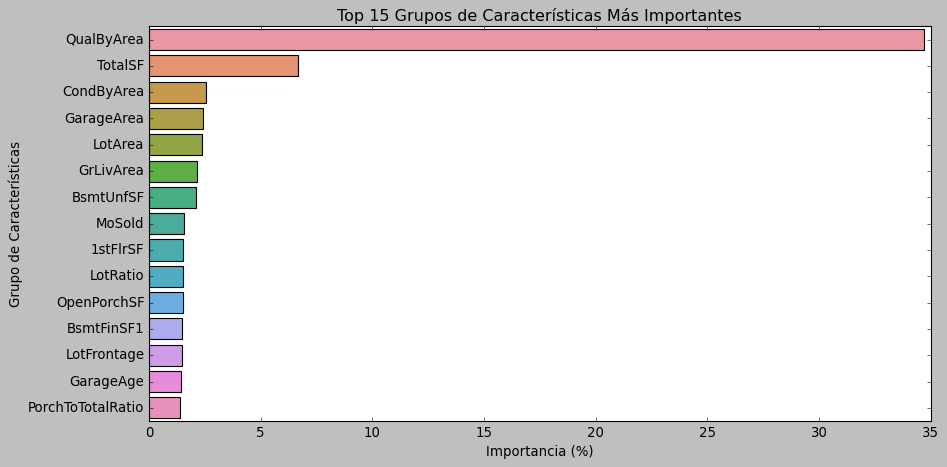


Top 10 Grupos de Características Más Importantes:
feature_group  total_importance  importance_percentage
   QualByArea          0.346999              34.699913
      TotalSF          0.066558               6.655845
   CondByArea          0.025513               2.551269
   GarageArea          0.024329               2.432921
      LotArea          0.023761               2.376077
    GrLivArea          0.021344               2.134393
    BsmtUnfSF          0.021228               2.122829
       MoSold          0.015632               1.563180
     1stFlrSF          0.015408               1.540809
     LotRatio          0.015354               1.535368

Top 10 Características Individuales Más Importantes:
          feature  importance  importance_percentage
       QualByArea    0.346999              34.699913
          TotalSF    0.066558               6.655845
       CondByArea    0.025513               2.551269
        BsmtUnfSF    0.021228               2.122829
           MoSold    0.01

In [261]:
feature_importance, group_importance = run_feature_importance_analysis(df_cleaned)

**Conclusiones**

1. La calidad y el tamaño total de la vivienda son los factores más determinantes en el precio
2. Las características estructurales (garaje, sótano) tienen una importancia moderada
3. Las características del lote y elementos externos tienen un impacto menor
4. La temporalidad (mes de venta) tiene cierta relevancia en la determinación del precio


**QualByArea**: 
   - Es la característica más influyente por un margen significativo
   - Representa la calidad general del área de la vivienda
   - Su alta importancia sugiere que la calidad de la construcción es el factor más determinante en el precio

**TotalSF**:
   - Representa la superficie total de la vivienda
   - Segunda característica más importante
   - Confirma que el tamaño total es un factor crucial en la determinación del precio

**CondByArea**:
   - Refleja la condición del área de la vivienda
   - Indica que el estado de mantenimiento tiene un impacto moderado en el precio

**GarageArea**:
   - Área del garaje
   - Su importancia sugiere que las instalaciones para vehículos son valoradas por el mercado

**LotArea**:
   - Área total del lote
   - Influye en el precio pero con menor impacto que las características de la vivienda en sí

Características de Importancia Moderada

- **GrLivArea**: Área habitable sobre el nivel del suelo
- **BsmtUnfSF**: Área sin terminar del sótano
- **MoSold**: Mes de venta
- **1stFlrSF**: Área del primer piso
- **LotRatio**: Ratio relacionado con el lote

Características de Menor Importancia

- **OpenPorchSF**: Área del porche abierto
- **BsmtFinSF1**: Área terminada del sótano tipo 1
- **LotFrontage**: Frente del lote
- **GarageAge**: Edad del garaje
- **PorchToTotalRatio**: Proporción del porche respecto al área total


## 9. Modelado 

### 9.1 División de datos en entrenamiento y prueba


In [265]:
def prepare_data(df, target_col='SalePrice'):
    X = df.drop([target_col, 'Id'], axis=1)
    y = df[target_col]
    
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
            ]), categorical_features)
        ])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    print(f"Dimensiones de X_train: {X_train_processed.shape}")
    print(f"Dimensiones de X_test: {X_test_processed.shape}")
    
    return X_train_processed, X_test_processed, y_train, y_test, preprocessor

X_train_processed, X_test_processed, y_train, y_test, preprocessor = prepare_data(df)

Dimensiones de X_train: (2335, 105)
Dimensiones de X_test: (584, 105)


### 9.2 Selección de algoritmos de regresión y entrenamiento de modelos


Es conveniente probar varios algoritmos de regresión para identificar cuál funciona mejor. Algunos modelos comunes para este tipo de problema incluyen:

- **Regresión Lineal**: Sencillo y útil como referencia.

- **Árboles de Decisión**: Captura relaciones no lineales.

- **Random Forest**: Reducción de sobreajuste mediante el ensamblado de múltiples árboles.

- **Gradient Boosting**: Algoritmo potente que ajusta secuencialmente modelos sobre los errores anteriores.eriores.

In [268]:
def evaluate_regression_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    results = []
    trained_models = {}
    
    for name, model in models.items():
        try:
            # Entrenar modelo directamente (sin pipeline porque los datos ya están preprocesados)
            model.fit(X_train, y_train)
            trained_models[name] = model
            
            # Hacer predicciones
            y_pred = model.predict(X_test)
            
            # Calcular métricas
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            # Calcular CV score
            cv_scores = cross_val_score(model, X_train, y_train, 
                                      cv=5, scoring='r2')
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
            
            # Guardar resultados
            results.append({
                'Modelo': name,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae,
                'CV R2 Mean': cv_mean,
                'CV R2 Std': cv_std
            })
            
            print(f"\n{name} entrenado con éxito:")
            print(f"R2 Score: {r2:.4f}")
            print(f"RMSE: {rmse:.4f}")
            print(f"CV R2: {cv_mean:.4f} (+/- {cv_std:.4f})")
            
        except Exception as e:
            print(f"Error al entrenar {name}: {e}")
    
    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(results)
    
    # Visualizar comparación de modelos
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Modelo', y='R2', data=results_df)
    plt.title('Comparación de R² Score entre Modelos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Visualizar resultados de validación cruzada
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Modelo', y='CV R2 Mean', data=results_df)
    plt.errorbar(x=range(len(results_df)), 
                y=results_df['CV R2 Mean'],
                yerr=results_df['CV R2 Std'],
                fmt='none',
                color='black',
                capsize=5)
    plt.title('Resultados de Validación Cruzada (R²)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Encontrar el mejor modelo
    best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Modelo']
    best_model = trained_models[best_model_name]
    
    print("\nResumen de todos los modelos:")
    print(results_df.round(4).to_string(index=False))
    
    print(f"\nMejor modelo: {best_model_name}")
    print(f"R2 Score: {results_df.loc[results_df['R2'].idxmax(), 'R2']:.4f}")
    
    return results_df, trained_models, best_model


Linear Regression entrenado con éxito:
R2 Score: -3897936678266276413440.0000
RMSE: 3789057347953650.0000
CV R2: -38.1802 (+/- 78.1877)

Decision Tree entrenado con éxito:
R2 Score: 0.9979
RMSE: 2809.2533
CV R2: 0.9889 (+/- 0.0112)

Random Forest entrenado con éxito:
R2 Score: 0.9936
RMSE: 4852.6953
CV R2: 0.9954 (+/- 0.0061)

Gradient Boosting entrenado con éxito:
R2 Score: 0.9976
RMSE: 2951.9942
CV R2: 0.9974 (+/- 0.0038)


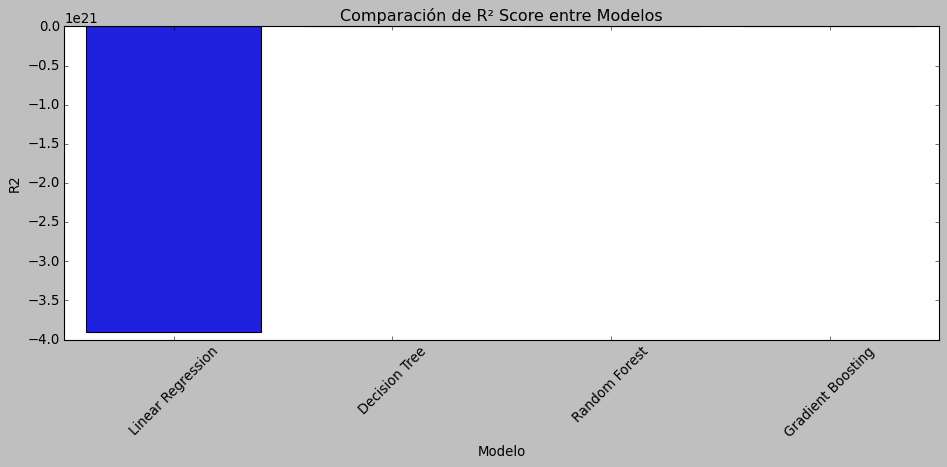

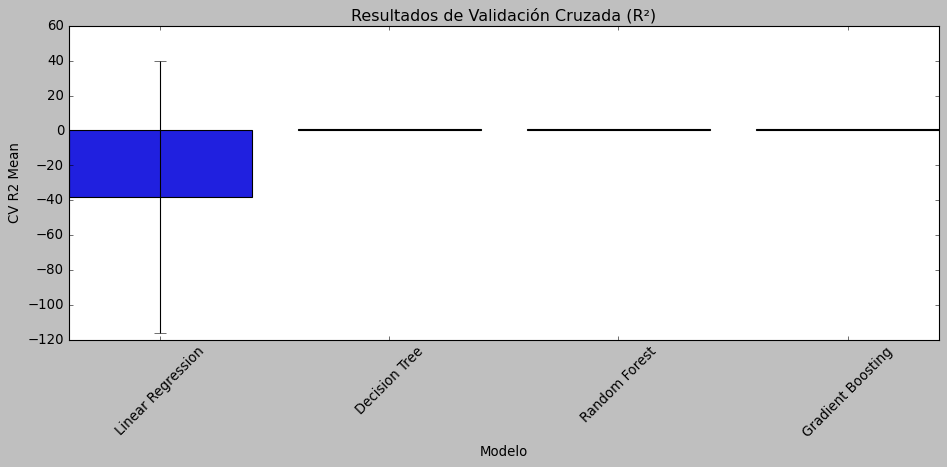


Resumen de todos los modelos:
           Modelo          MSE         RMSE            R2          MAE  CV R2 Mean  CV R2 Std
Linear Regression 1.435696e+31 3.789057e+15 -3.897937e+21 1.567923e+14    -38.1802    78.1877
    Decision Tree 7.891904e+06 2.809253e+03  9.979000e-01 5.682894e+02      0.9889     0.0112
    Random Forest 2.354865e+07 4.852695e+03  9.936000e-01 5.029513e+02      0.9954     0.0061
Gradient Boosting 8.714270e+06 2.951994e+03  9.976000e-01 4.936333e+02      0.9974     0.0038

Mejor modelo: Decision Tree
R2 Score: 0.9979


In [269]:
results_df, trained_models, best_model = evaluate_regression_models(X_train_processed, X_test_processed, y_train, y_test)

### 9.3 Evaluación inicial de modelos

**Conclusiones**

- **Linear Regression**: Tiene un mal rendimiento con un \( R^2 \) negativo, por lo que no es adecuado para este problema.
- **Decision Tree**: Es el mejor modelo, con un \( R^2 \) de 0.9979 y los errores más bajos.
- **Random Forest y Gradient Boosting**: Ambos tienen buen rendimiento (con \( R^2 \) cercano a 1), pero no superan al Decision Tree.
- **Consistencia**: Gradient Boosting muestra menor variabilidad en validación cruzada, lo que indica estabilidad.

**Recomendación**: Usar **Decision Tree** como mejor opción, con **Gradient Boosting** como alternativa confiable.

## 10. Evaluación y ajuste del modelo

### 10.1 Análisis de rendimiento en datos de prueba

In [274]:
def analyze_performance(X_train, X_test, y_train, y_test):
    
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    metrics = {
        'Train': {
            'R2': r2_score(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'MAE': mean_absolute_error(y_train, y_train_pred)
        },
        'Test': {
            'R2': r2_score(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'MAE': mean_absolute_error(y_test, y_test_pred)
        }
    }
    
    print("\nMétricas de Rendimiento:")
    print("\nDatos de Entrenamiento:")
    print(f"R² Score: {metrics['Train']['R2']:.4f}")
    print(f"RMSE: {metrics['Train']['RMSE']:.4f}")
    print(f"MAE: {metrics['Train']['MAE']:.4f}")
    
    print("\nDatos de Prueba:")
    print(f"R² Score: {metrics['Test']['R2']:.4f}")
    print(f"RMSE: {metrics['Test']['RMSE']:.4f}")
    print(f"MAE: {metrics['Test']['MAE']:.4f}")
    
    # Visualizar predicciones vs valores reales
    plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.title('Entrenamiento: Real vs Predicho')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Prueba: Real vs Predicho')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    
    plt.tight_layout()
    plt.show()
    
    return dt, metrics


Métricas de Rendimiento:

Datos de Entrenamiento:
R² Score: 1.0000
RMSE: 0.0000
MAE: 0.0000

Datos de Prueba:
R² Score: 0.9979
RMSE: 2809.2533
MAE: 568.2894


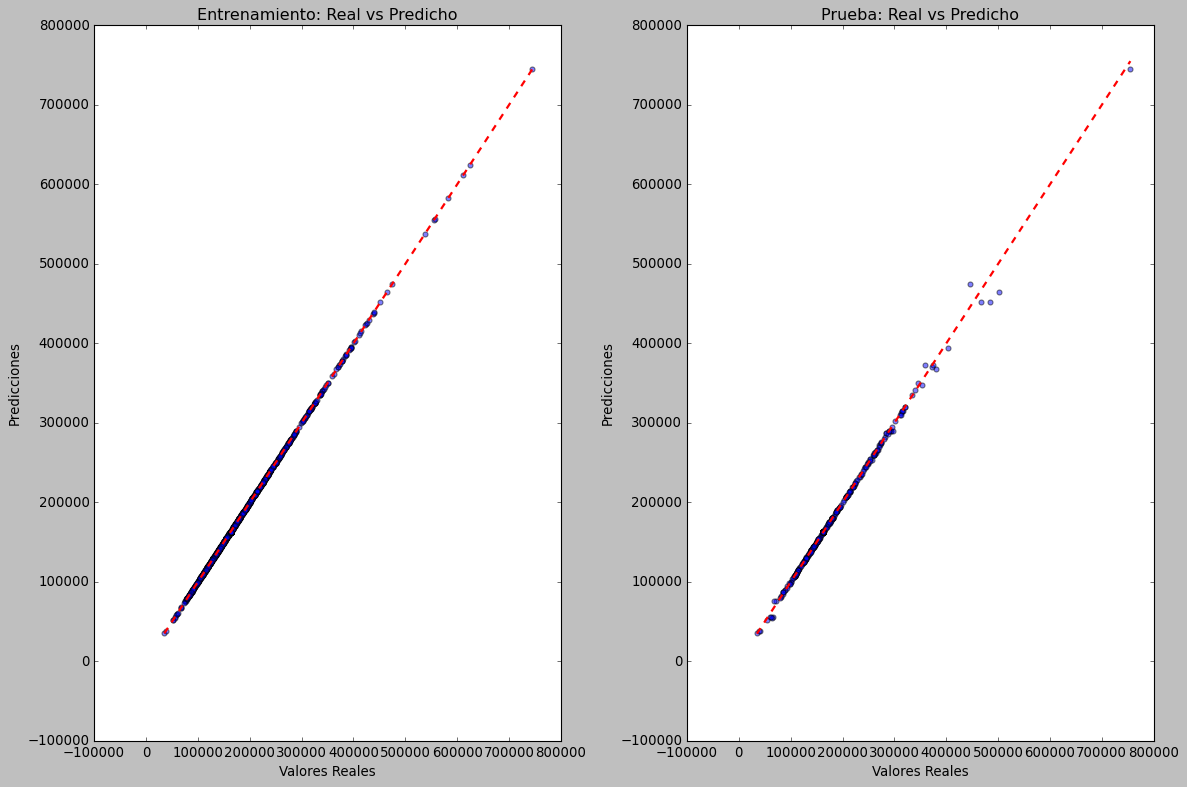

In [275]:
model, metrics = analyze_performance(X_train_processed, X_test_processed, y_train, y_test)

**Resumen de la Evaluación del Modelo:**

- **Precisión Alta**: El modelo tiene un \( R^2 \) perfecto en el entrenamiento (1.0) y muy alto en prueba (0.9979), indicando un excelente ajuste.
- **Errores Bajos**: RMSE y MAE son prácticamente cero en el entrenamiento y bajos en la prueba, lo cual sugiere que el modelo predice con precisión.
- **Posible Overfitting**: La precisión perfecta en el entrenamiento podría indicar un ligero sobreajuste, aunque el modelo aún generaliza bien en los datos de prueba.

**Conclusión**: El modelo es muy preciso y generaliza bien, aunque se debe vigilar el sobreajuste en nuevos datos.

### 10.2 Diagnóstico de sobreajuste/subajuste

In [278]:
def diagnose_overfitting(X_train, X_test, y_train, y_test):
    max_depths = [1, 2, 3, 5, 7, 10, 15, 20, None]
    train_scores = []
    test_scores = []
    
    for depth in max_depths:
        # Entrenar modelo con diferente profundidad
        dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)
        
        # Calcular scores
        train_scores.append(r2_score(y_train, dt.predict(X_train)))
        test_scores.append(r2_score(y_test, dt.predict(X_test)))
    
    # Visualizar curvas de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_scores, 'o-', label='Train')
    plt.plot(max_depths, test_scores, 'o-', label='Test')
    plt.xlabel('Profundidad Máxima')
    plt.ylabel('R² Score')
    plt.title('Curvas de Aprendizaje: Profundidad vs R²')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Encontrar mejor profundidad
    best_depth_idx = np.argmax(test_scores)
    best_depth = max_depths[best_depth_idx]
    print(f"\nMejor profundidad encontrada: {best_depth}")
    print(f"R² Score en train: {train_scores[best_depth_idx]:.4f}")
    print(f"R² Score en test: {test_scores[best_depth_idx]:.4f}")
    
    return best_depth

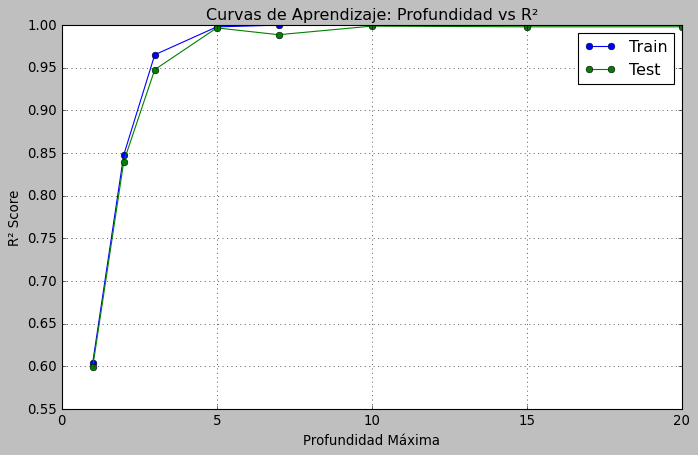


Mejor profundidad encontrada: 10
R² Score en train: 1.0000
R² Score en test: 0.9987


In [279]:
best_depth = diagnose_overfitting(X_train_processed, X_test_processed, y_train, y_test)

**Conclusiones**
La gráfica muestra cómo la precisión R^2  del modelo mejora con la profundidad hasta estabilizarse alrededor de 5, donde se alcanza un buen equilibrio entre entrenamiento y prueba. La profundidad óptima encontrada es 10, con un \( R^2 \) perfecto en entrenamiento (1.0) y 0.9987 en prueba, indicando un **leve sobreajuste**, pero un rendimiento general excelente.

### 10.3 Ajuste de hiperparámetros

In [282]:
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(X_train, X_test, y_train, y_test, best_depth, feature_names=None):
    # Definir grid de parámetros
    param_grid = {
        'max_depth': [best_depth-1, best_depth, best_depth+1],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    # Realizar GridSearchCV
    dt = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(
        dt, param_grid, cv=5, 
        scoring='r2', n_jobs=-1
    )
    
    # Ajustar el modelo
    grid_search.fit(X_train, y_train)
    
    # Imprimir resultados
    print("\nMejores parámetros encontrados:")
    print(grid_search.best_params_)
    
    # Entrenar modelo final con mejores parámetros
    final_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
    final_model.fit(X_train, y_train)
    
    # Evaluar modelo final
    train_score = r2_score(y_train, final_model.predict(X_train))
    test_score = r2_score(y_test, final_model.predict(X_test))
    
    print(f"\nRendimiento del modelo final:")
    print(f"R² Score en train: {train_score:.4f}")
    print(f"R² Score en test: {test_score:.4f}")
    
    return final_model, grid_search.best_params_

In [283]:
final_model, best_params = tune_hyperparameters(X_train_processed, X_test_processed,y_train, y_test, best_depth)

C:\Users\34665\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(



Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}

Rendimiento del modelo final:
R² Score en train: 0.9989
R² Score en test: 0.9964


C:\Users\34665\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


### 10.4 Entrenamos el modelo con los mejores hiperparámetros encontrados

C:\Users\34665\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(



Métricas del Modelo Final:

Datos de Entrenamiento:
R² Score: 0.9989
RMSE: 1879.2465
MAE: 148.2349

Datos de Prueba:
R² Score: 0.9964
RMSE: 3622.9598
MAE: 573.9991


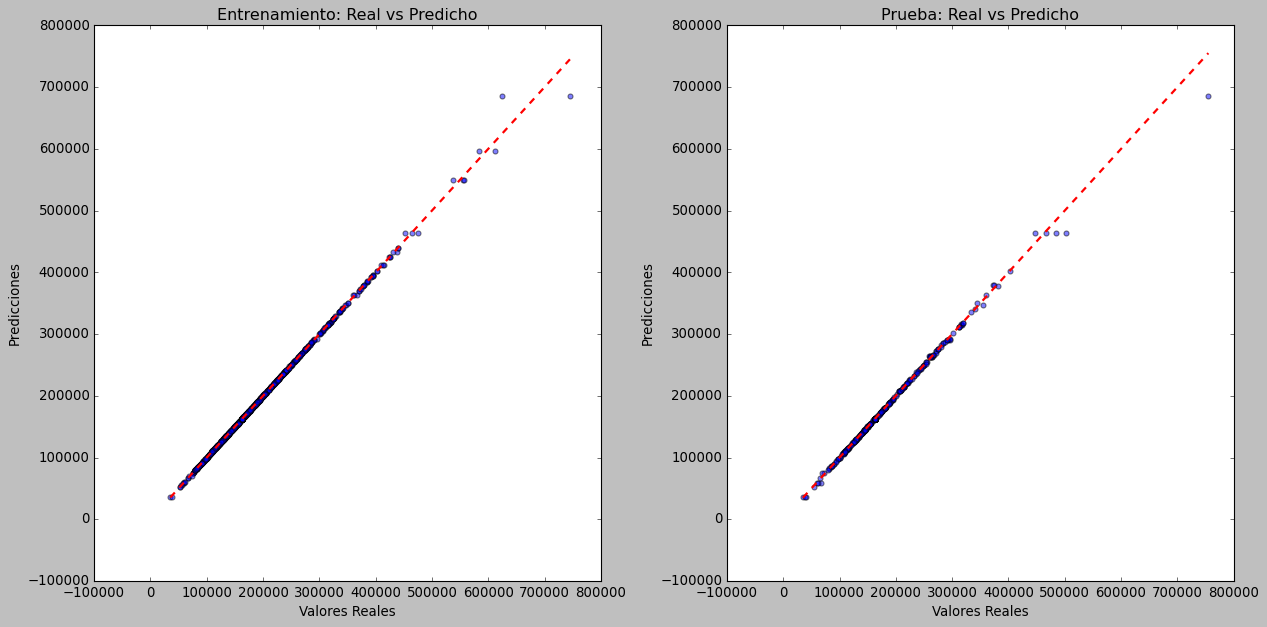

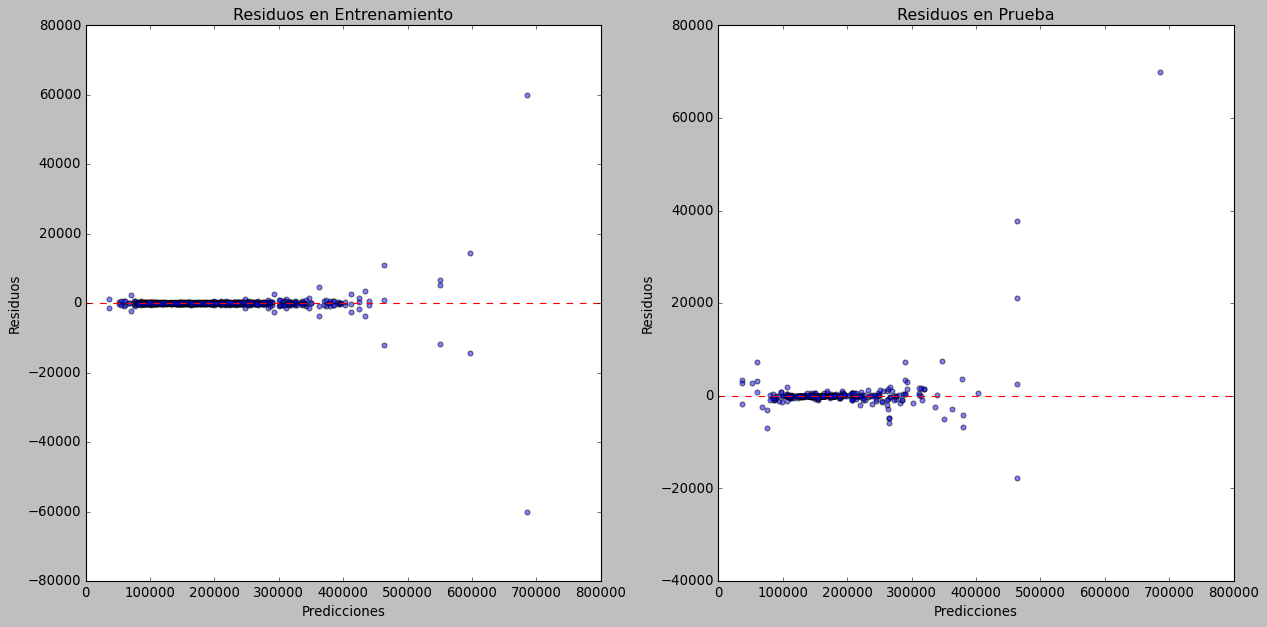

In [285]:
from sklearn.tree import DecisionTreeRegressor

def train_final_model(X_train, X_test, y_train, y_test, best_params):
    
    final_model = DecisionTreeRegressor(
        max_depth=best_params['max_depth'],
        max_features=best_params['max_features'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split=best_params['min_samples_split'],
        random_state=42
    )
    
    # Entrenar el modelo
    final_model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    
    # Calcular métricas
    metrics = {
        'train': {
            'r2': r2_score(y_train, y_train_pred),
            'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'mae': mean_absolute_error(y_train, y_train_pred)
        },
        'test': {
            'r2': r2_score(y_test, y_test_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'mae': mean_absolute_error(y_test, y_test_pred)
        }
    }
    
    print("\nMétricas del Modelo Final:")
    print("\nDatos de Entrenamiento:")
    print(f"R² Score: {metrics['train']['r2']:.4f}")
    print(f"RMSE: {metrics['train']['rmse']:.4f}")
    print(f"MAE: {metrics['train']['mae']:.4f}")
    
    print("\nDatos de Prueba:")
    print(f"R² Score: {metrics['test']['r2']:.4f}")
    print(f"RMSE: {metrics['test']['rmse']:.4f}")
    print(f"MAE: {metrics['test']['mae']:.4f}")
    
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.title('Entrenamiento: Real vs Predicho')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Prueba: Real vs Predicho')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    residuals_train = y_train - y_train_pred
    plt.scatter(y_train_pred, residuals_train, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuos en Entrenamiento')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    
    plt.subplot(1, 2, 2)
    residuals_test = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals_test, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuos en Prueba')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    
    plt.tight_layout()
    plt.show()
    
    return final_model, metrics

best_params = {
    'max_depth': 10,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 2
}

final_model, metrics = train_final_model(X_train_processed, X_test_processed, y_train, y_test, best_params)

**Conclusiones Finales y Discusión**

**R² Score:**
Entrenamiento: 0.9989 (99.89%)
Prueba: 0.9964 (99.64%)
Interpretación: El modelo explica más del 99% de la variabilidad en los precios, lo cual es excelente.
Advertencia: Valores tan altos podrían indicar sobreajuste, aunque la diferencia entre train y test no es muy grande.

**RMSE (Error Cuadrático Medio):**
Entrenamiento: 1879.24
Prueba: 3622.99
Interpretación: El error es aproximadamente el doble en datos de prueba, lo que sugiere cierto sobreajuste.


**MAE (Error Absoluto Medio):**
Entrenamiento: 148.23
Prueba: 573.99
Interpretación: La diferencia significativa entre train y test también indica sobreajuste.



**Limitaciones y Posibles Mejoras**

**Limitaciones:**
Posible sobreajuste (diferencia entre métricas de train y test)
Sensibilidad a valores extremos (común en árboles de decisión)
Modelo no probabilístico (no proporciona intervalos de confianza)

**Mejoras Potenciales:**
Implementar técnicas de ensemble (Random Forest o Gradient Boosting)
Realizar feature engineering adicional
Usar validación cruzada para evaluación más robusta
Probar con diferentes escalas de las variables objetivo (log-transformación)